# Project: Wrangling and Analyze Data

In [1]:
# Import functions
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
import tweepy
import json
from timeit import default_timer
import missingno as msno
import seaborn as sns

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [2]:
# Getting the data wrangling directory 
data_wrangling_directory=('C:\\Users\\User\\OneDrive\\Documents\\Udacity\\Nanodegree\\Introduction_to_Data_Analysis\\data_wrangling\\')

In [3]:
# Reading the provided twitter-archive-enhanced.csv file using pandas read_csv function.
twit_arch_csv_path = os.path.join(data_wrangling_directory,'twitter-archive-enhanced.csv')
twit_arch_csv = pd.read_csv(twit_arch_csv_path)
twit_arch_csv.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [4]:
# Functions
def create_request(url_path):
    '''Function using the requests library to access the web content.'''
    response = requests.get(url_path)
    return response

def save_response_file(path_to_save_response, response):
    '''Function to write the content to a saved file.'''
    with open(path_to_save_response, mode='wb') as file:
        file.write(response.content)

def create_dir(dir_path):
    '''Function to create a directory path if it does not exist.'''
    if not os.path.exists(dir_path):
        os.mkdir(dir_path)
    return dir_path

In [5]:
# Downloading the tweet image prediction using the requests library
url_path ='https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = create_request(url_path)
dir_path_for_response = create_dir('C:\\Users\\User\\Documents\\Udacity\\Nanodegree\\Introduction_to_Data_Analysis\\data_wrangling\\image_predictions')
path_to_save_response = os.path.join(dir_path_for_response, url_path.split('/')[-1]) 
save_response_file(path_to_save_response, response)

In [6]:
# To check the total number of files and name of the file downloaded using the requests library
len(os.listdir(dir_path_for_response)), os.listdir(dir_path_for_response)

(1, ['image-predictions.tsv'])

In [7]:
# Reading the downloaded image-predictions.tsv file using pandas read_csv function.
image_pred_tsv_path=os.path.join(data_wrangling_directory, 'image_predictions\\image-predictions.tsv')
image_pred_tsv_file=pd.read_csv(image_pred_tsv_path, sep='\t')
image_pred_tsv_file.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [8]:
# Loading the confedential API keys stored in a JSON file
path_to_api_info = open(os.path.join(data_wrangling_directory,'twitter_dev_api\\tweet_credentials.json'), mode='r')
tweet_credentials = json.load(path_to_api_info)

consumer_key = tweet_credentials['consumer_key']
consumer_secret = tweet_credentials['consumer_secret']
access_token = tweet_credentials['access_token']
access_token_secret = tweet_credentials['access_token_secret']

# Accessing the Twitter API
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth=auth, wait_on_rate_limit=True)

# Reference for storing and loading API keys in JSON file:\ 
# https://towardsdatascience.com/store-api-credentials-easily-and-securely-in-jupyter-notebooks-50411e98e81c

In [9]:
# Functions
def save_api_json_to_new_txt_file(path_to_save_txt, api_json_data):
    '''Function to write the content to a new file.'''
    assert os.path.exists(path_to_save_txt)==False, f'This file path:{path_to_save_txt} already exists.'
    with open(path_to_save_txt, mode='w', encoding='utf-8') as file:
        json.dump(api_json_data, file, ensure_ascii=False)

def check_if_data_exists_txt(path_to_txt, api_json_data):
    '''Function to check if the data already exists in the file.'''
    assert os.path.exists(path_to_txt), f'This file path:{path_to_txt} does not exists.'
    api_json_id = api_json_data['id']
    api_json_text = api_json_data['text']
    with open(path_to_txt, mode='r', encoding='utf-8') as file:
        for line in file:
            # convert string output to dictionary
            line_dict=json.loads(line)
            line_dict_id = line_dict['id']
            line_dict_text = line_dict['text']
            # checking if the 'id' and the 'text' for the new api data corresponds with any existing api data in the file.
            if (line_dict_id==api_json_id) and (line_dict_text==api_json_text):
                data_found=True
                break
            else:
                data_found=False
    return data_found
    
def save_api_json_to_existing_txt_file(path_to_txt, api_json_data):
    '''Function to write the content to a saved file.'''
    assert os.path.exists(path_to_txt), f'This file path:{path_to_txt} does not exists.'
    data_found = check_if_data_exists_txt(path_to_txt, api_json_data)
    if data_found==False:
        print('-> Appending the api data into the file.\n')
        with open(path_to_txt, mode='a', encoding='utf-8') as file:
            file.write('\n')
            json.dump(api_json_data, file, ensure_ascii=False)
    else:
        print(f'-> The api data already exists in the file path: {path_to_txt}.\
        There is no need to rewrite it into the file.\n')

def get_tweet_id_data (api, tweet_id):
    '''Querying the Twitter API to obtain the tweet_id JSON data.'''
    try:
        # if status exists for the tweet id.
        tweet_data = api.get_status(tweet_id)
        print(tweet_data.text)
    except:
         # if no status exists for the tweet id.
        print('No status found with that ID')
        tweet_data=None
    return tweet_data

# Reference:
# To create the save_api_json_to_txt_file: https://stackoverflow.com/questions/12309269/how-do-i-write-json-data-to-a-file
# To create the get_tweet_id_data function: https://stackoverflow.com/questions/28384588/twitter-api-get-tweets-with-specific-id

In [10]:
# Getting the tweet_id column from the 'WeRateDogs Twitter archive' csv file.
twit_arch_tweet_id_list = twit_arch_csv['tweet_id']

# Printing the list of tweet_ids and cheking its length.
twit_arch_tweet_id_list, len(twit_arch_tweet_id_list)

(0       892420643555336193
 1       892177421306343426
 2       891815181378084864
 3       891689557279858688
 4       891327558926688256
                ...        
 2351    666049248165822465
 2352    666044226329800704
 2353    666033412701032449
 2354    666029285002620928
 2355    666020888022790149
 Name: tweet_id, Length: 2356, dtype: int64,
 2356)

In [22]:
start=default_timer()
# Creating the directory to save the tweet_data
data_dir=create_dir(os.path.join(data_wrangling_directory,'tweet_json\\'))
data_path= os.path.join(data_dir, 'tweet-json.txt')
for i in range(len(twit_arch_tweet_id_list)):
    tweet_data = get_tweet_id_data(api, twit_arch_tweet_id_list[i])
    if tweet_data!=None:
        # Storing the content of the _json key from the API into a text file.
        if os.path.exists(data_path)==False:
            # write json to a new txt file.
            save_api_json_to_new_txt_file(data_path, tweet_data._json)
        else:
             # append json to an appending file.
            save_api_json_to_existing_txt_file(data_path, tweet_data._json)
end=default_timer()
print(f'It took {(end-start)} seconds to execute this cell.')

This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU
This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boop… https://t.co/aQFSeaCu9L
-> Appending the api data into the file.

This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike.… https://t.co/r0YlrsGCgy
-> Appending the api data into the file.

This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ
-> Appending the api data into the file.

This is Franklin. He would like you to stop calling him "cute." He is a very fierce shark and should be respected a… https://t.co/0g0KMIVXZ3
-> Appending the api data into the file.

Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG:… https://t.co/xx5cilW0Dd
-> Appending the api data into the file.

Meet Jax. He 

Rate limit reached. Sleeping for: 614


Meet Boston. He's worried because his tongue won't fit all the way in his mouth. 12/10 it'll be ok deep breaths pup https://t.co/rfWQ4T9iQj
-> Appending the api data into the file.

This is Brandonald. He accidentally opened the front facing camera. Playing it off rather heckin well. 11/10 https://t.co/uPUAotqQtM
-> Appending the api data into the file.

Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE
-> Appending the api data into the file.

This is Odie. He falls asleep wherever he wants. Must be nice. 10/10 https://t.co/M9BXCSDVjh
-> Appending the api data into the file.

This is Corey. He's a Portobello Corgicool. Trying to convince you that he's not a hipster. 11/10 yea right Corey https://t.co/NzWUrFZydr
-> Appending the api data into the file.

In case you haven't seen the most dramatic sneeze ever... 13/10 https://t.co/iy7ylyZcsE
-> Appending the api data into the file.

Teagan reads entire books in store so they're free. Loved 50 Shades of Grey (

Rate limit reached. Sleeping for: 560


This is Cooper. He doesn't know how cheese works. Likes the way it feels on his face. Cheeky tongue slip. 11/10 https://t.co/j1zczS0lI5
-> Appending the api data into the file.

10/10 I'd follow this dog into battle no questions asked https://t.co/ngTNXYQF0L
-> Appending the api data into the file.

This is Tyrus. He's a Speckled Centennial Ticonderoga. Terrified of floating red ball. Nifty bandana. 8/10 v petable https://t.co/HqM3YhCaaa
-> Appending the api data into the file.

This is Karl. Karl thinks he's slick. 6/10 sneaky pup https://t.co/Lo4ALwjVh4
-> Appending the api data into the file.

This pups goal was to get all four feet as close to each other as possible. Valiant effort 12/10 https://t.co/2mXALbgBTV
-> Appending the api data into the file.

Who leaves the last cupcake just sitting there? 9/10 https://t.co/PWMqAoEx2a
-> Appending the api data into the file.

Here we see a rare pouched pupper. Ample storage space. Looks alert. Jumps at random. Kicked open that door. 8/10 

In [11]:
tweets_list = []
txt_path = os.path.join(data_wrangling_directory,'tweet_json\\tweet-json.txt')
with open(txt_path, mode='r', encoding='utf=8') as file:
    for line in file:
        # Loading each line as a json dictionary
        line_dict=json.loads(line)
        # Getting the values for the following keys; 'id', 'retweet_count', 'favorite_count' from json dictionary.
        tweet_id= line_dict['id']
        retweet_count=line_dict['retweet_count']
        favorite_count=line_dict['favorite_count']
        text=line_dict['text']
        # Append to list of dictionaries
        tweets_list.append({'tweet_id':tweet_id,
                            'retweet_count':retweet_count,
                            'favorite_count':favorite_count
                            })
# Creating a pandas dataframe with columns; 'id', 'retweet_count', and 'favorite_count'.
tweet_json_df = pd.DataFrame(tweets_list, columns=['tweet_id', 'retweet_count', 'favorite_count'])
tweet_json_df.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,6847,32803
1,892177421306343426,5154,28351
2,891815181378084864,3403,21291
3,891689557279858688,7056,35758
4,891327558926688256,7567,34189


In [12]:
# Saving the tweet_json_df to a csv file so as to retrieve later.
csv_json_dir = os.path.join(data_wrangling_directory,'tweet_json\\')
path_to_save_csv= os.path.join(csv_json_dir, 'tweet_json_extract.csv')
tweet_json_df.to_csv(path_or_buf=path_to_save_csv, index=False)

## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



#### twitter-archive-enhanced.csv

In [13]:
# To increase the width when displaying the CSV file.
pd.set_option('display.max_colwidth', 0)
# Reference: https://stackoverflow.com/questions/34376896/pandas-dataframes-how-to-wrap-text-with-no-whitespace

In [14]:
# Reading the provided twitter-archive-enhanced.csv file using pandas read_csv function.
twit_arch_csv_path = os.path.join(data_wrangling_directory,'twitter-archive-enhanced.csv')
twit_arch_csv = pd.read_csv(twit_arch_csv_path)
# Viewing the first 10 rows of the twitter-archive-enhanced.csv file.
twit_arch_csv.head(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950875897856/photo/1,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below\n\nhttps://t.co/Zr4hWfAs1H https://t.co/tVJBRMnhxl,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,https://twitter.com/dog_rates/status/890971913173991426/photo/1",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/890729181411237888/photo/1,https://twitter.com/dog_rates/status/890729181411237888/photo/1",13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Zoey. She doesn't want to be one of the scary sharks. Just wants to be a snuggly pettable boatpet. 13/10 #BarkWeek https://t.co/9TwLuAGH0b,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185150312448/photo/1,13,10,Zoey,None,None,None,None
9,89024025534

In [15]:
# Viewing the last 10 rows of the twitter-archive-enhanced.csv file.
twit_arch_csv.tail(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2346,666058600524156928,NaN,NaN,2015-11-16 01:01:59 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here is the Rand Paul of retrievers folks! He's probably good at poker. Can drink beer (lol rad). 8/10 good dog https://t.co/pYAJkAe76p,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666058600524156928/photo/1,8,10,the,None,None,None,None
2347,666057090499244032,NaN,NaN,2015-11-16 00:55:59 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",My oh my. This is a rare blond Canadian terrier on wheels. Only $8.98. Rather docile. 9/10 very rare https://t.co/yWBqbrzy8O,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666057090499244032/photo/1,9,10,a,None,None,None,None
2348,666055525042405380,NaN,NaN,2015-11-16 00:49:46 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here is a Siberian heavily armored polar bear mix. Strong owner. 10/10 I would do unspeakable things to pet this dog https://t.co/rdivxLiqEt,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666055525042405380/photo/1,10,10,a,None,None,None,None
2349,666051853826850816,NaN,NaN,2015-11-16 00:35:11 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is an odd dog. Hard on the outside but loving on the inside. Petting still fun. Doesn't play catch well. 2/10 https://t.co/v5A4vzSDdc,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666051853826850816/photo/1,2,10,an,None,None,None,None
2350,666050758794694657,NaN,NaN,2015-11-16 00:30:50 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a truly beautiful English Wilson Staff retriever. Has a nice phone. Privileged. 10/10 would trade lives with https://t.co/fvIbQfHjIe,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666050758794694657/photo/1,10,10,a,None,None,None,None
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a 1949 1st generation vulpix. Enjoys sweat tea and Fox News. Cannot be phased. 5/10 https://t.co/4B7cOc1EDq,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248165822465/photo/1,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a purebred Piers Morgan. Loves to Netflix and chill. Always looks like he forgot to unplug the iron. 6/10 https://t.co/DWnyCjf2mx,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226329800704/photo/1,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would cuddle af https://t.co/y671yMhoiR,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412701032449/photo/1,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a western brown Mitsubishi terrier. Upset about leaf. Actually 2 dogs here. 7/10 would walk the shit out of https://t.co/r7mOb2m0UI,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285002620928/photo/1,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a Japanese Irish Setter. Lost eye in Vietnam (?). Big fan of relaxing on stair. 8/10 would pet https://t.co/BLDqew2Ijj,NaN,NaN,NaN,https://twi

In [16]:
# Getting a summary information on the twitter-archive-enhanced.csv data.
twit_arch_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [17]:
# Getting a descriptive summary of the twitter-archive-enhanced.csv data.
twit_arch_csv.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [18]:
# Displaying five (5) samples of the twitter-archive-enhanced.csv data.
twit_arch_csv.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2213,668567822092664832,NaN,NaN,2015-11-22 23:12:44 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Marvin. He can tie a bow tie better than me. 11/10 https://t.co/81kzPgqjQ3,NaN,NaN,NaN,https://twitter.com/dog_rates/status/668567822092664832/photo/1,11,10,Marvin,None,None,None,None
1201,716447146686459905,NaN,NaN,2016-04-03 02:08:05 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine - Make a Scene</a>",This is Ozzy. He's acrobatic af. Legendary pupper status achieved. 13/10 https://t.co/gHWsCTu90E,NaN,NaN,NaN,https://vine.co/v/eMmXVPn5eQK,13,10,Ozzy,None,None,pupper,None
1173,720340705894408192,NaN,NaN,2016-04-13 19:59:42 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Derek. He just got balled on. Can't even get up. Poor thing. 10/10 hang in there pupper https://t.co/BIRRF3bcWH,NaN,NaN,NaN,https://twitter.com/dog_rates/status/720340705894408192/photo/1,10,10,Derek,None,None,pupper,None
568,802185808107208704,NaN,NaN,2016-11-25 16:22:55 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","RT @ChinoChinako: They're good products, Brent\n\nMug holds drinks; hoodie is comfy af. 13/10 \n\nPuppy Aika h*cking agrees. @dog_rates https:/…",8.000650e+17,24885566.0,2016-11-19 19:55:41 +0000,"https://twitter.com/ChinoChinako/status/800065028116385792/photo/1,https://twitter.com/ChinoChinako/status/800065028116385792/photo/1,https://twitter.com/ChinoChinako/status/800065028116385792/photo/1",13,10,None,None,None,None,None
2027,671874878652489728,NaN,NaN,2015-12-02 02:13:48 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Mia. She was specifically told not get on top of the hutch or play in the fridge. 10/10 what a rebel https://t.co/3J7wkwW4FG,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/671874878652489728/photo/1,https://twitter.com/dog_rates/status/671874878652489728/photo/1",10,10,Mia,None,None,None,None


In [19]:
# Checking for the total number of missing values per column of the twitter-archive-enhanced.csv data.
twit_arch_csv.isna().sum()

tweet_id                      0   
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                     0   
source                        0   
text                          0   
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                 59  
rating_numerator              0   
rating_denominator            0   
name                          0   
doggo                         0   
floofer                       0   
pupper                        0   
puppo                         0   
dtype: int64

<AxesSubplot:>

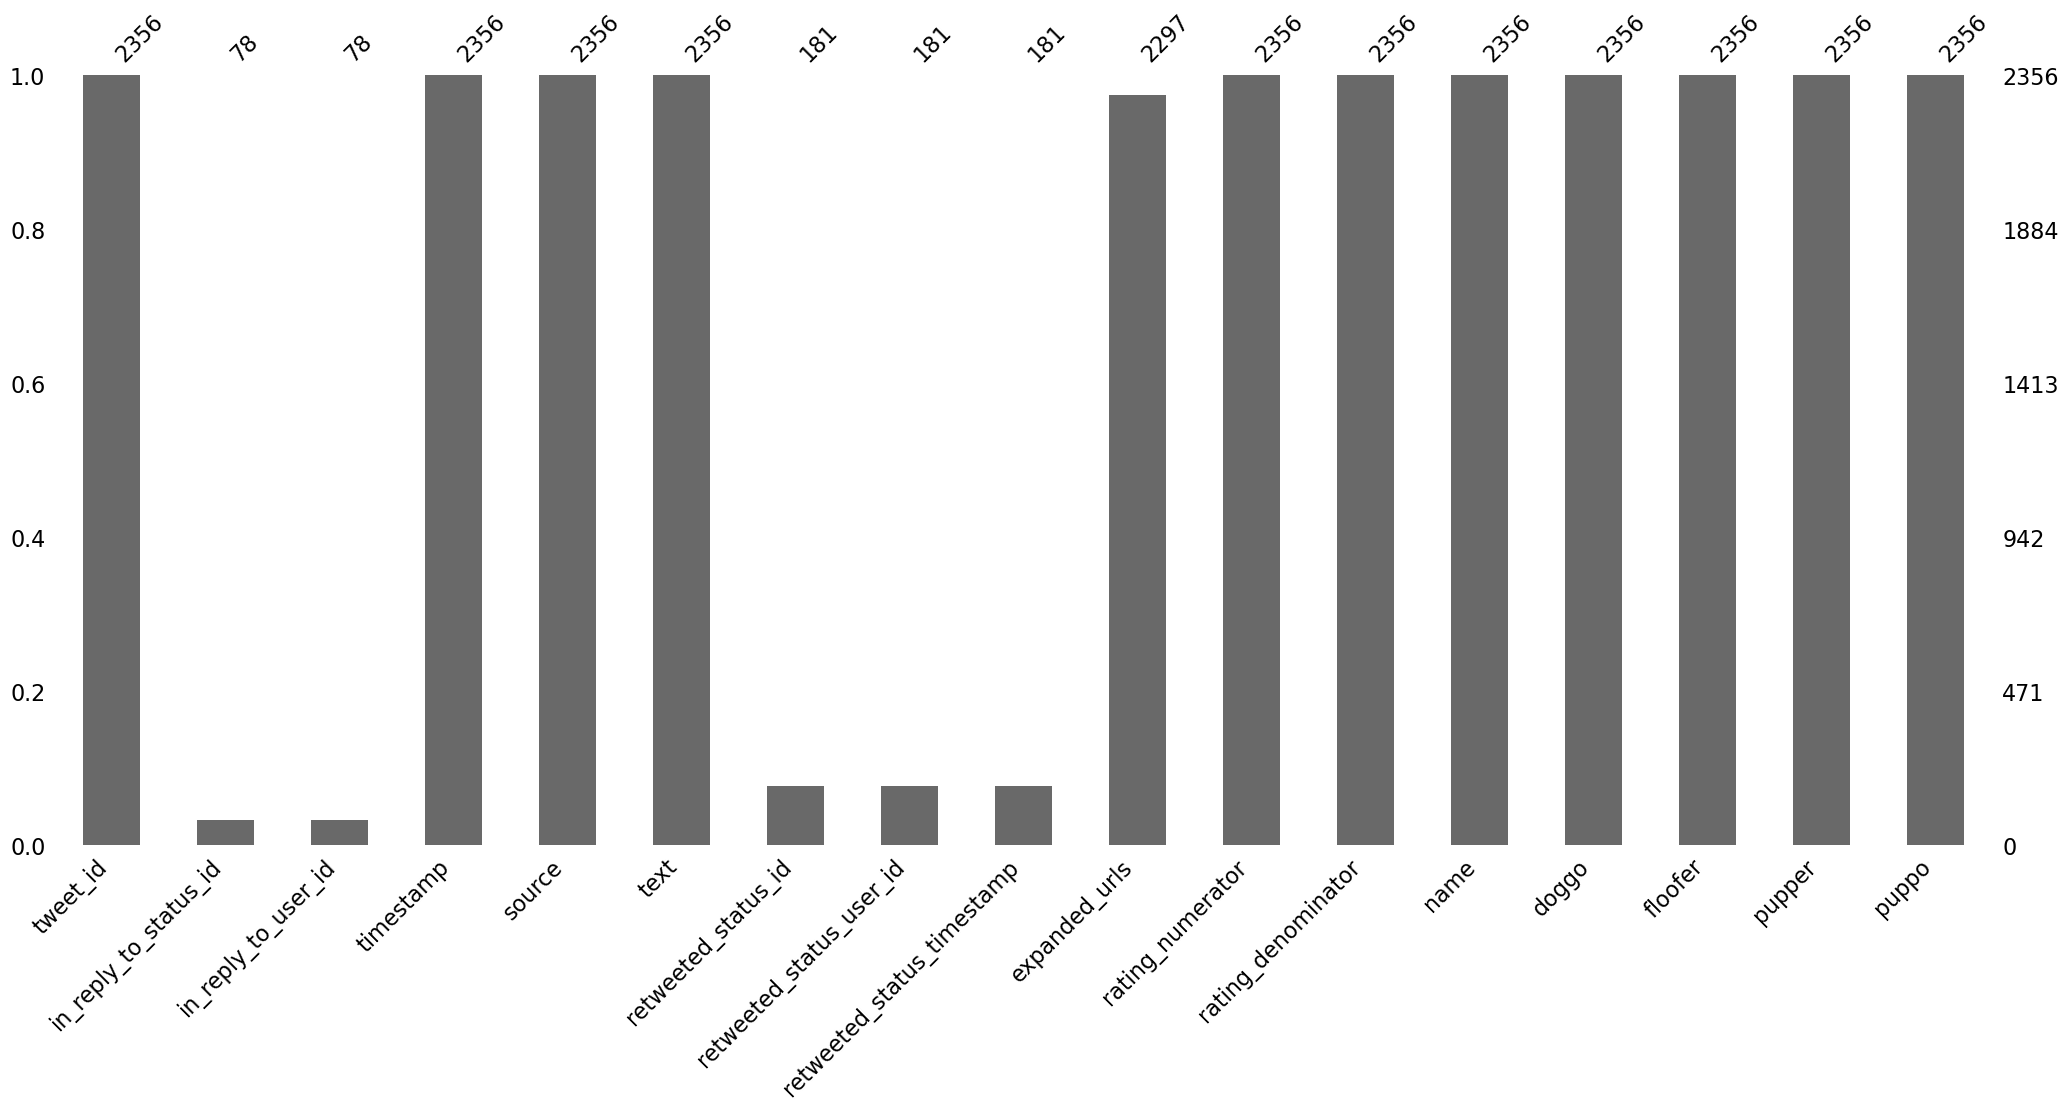

In [20]:
# Visualizing the number of non-missing values in twitter-archive-enhanced.csv dataset.
msno.bar(twit_arch_csv)

# Reference: https://www.geeksforgeeks.org/python-visualize-missing-values-nan-values-using-missingno-library/?ref=rp

In [21]:
# Checking for the value_count under the 'expanded_urls' column in the twitter-archive-enhanced.csv dataset.
twit_arch_csv.expanded_urls.value_counts() 

https://twitter.com/dog_rates/status/667152164079423490/photo/1                                                                                                                                                                                                    2
https://twitter.com/dog_rates/status/718631497683582976/photo/1                                                                                                                                                                                                    2
https://twitter.com/dog_rates/status/783839966405230592/photo/1,https://twitter.com/dog_rates/status/783839966405230592/photo/1,https://twitter.com/dog_rates/status/783839966405230592/photo/1                                                                    2
https://twitter.com/dog_rates/status/774314403806253056/photo/1,https://twitter.com/dog_rates/status/774314403806253056/photo/1,https://twitter.com/dog_rates/status/774314403806253056/photo/1,https://twitter.com/dog_r

In [22]:
# Checking for any duplicated values under the 'expanded_urls' column in the twitter-archive-enhanced.csv dataset.
twit_arch_csv[twit_arch_csv.expanded_urls.duplicated()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
55,881633300179243008,8.816070e+17,4.738443e+07,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@roushfenway These are good dogs but 17/10 is an emotional impulse rating. More like 13/10s,NaN,NaN,NaN,NaN,17,10,None,None,None,None,None
64,879674319642796034,8.795538e+17,3.105441e+09,2017-06-27 12:14:36 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@RealKentMurphy 14/10 confirmed,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
75,878281511006478336,NaN,NaN,2017-06-23 16:00:04 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","Meet Shadow. In an attempt to reach maximum zooming borkdrive, he tore his ACL. Still 13/10 tho. Help him out below\n\nhttps://t.co/245xJJElsY https://t.co/lUiQH219v6",NaN,NaN,NaN,"https://www.gofundme.com/3yd6y1c,https://twitter.com/dog_rates/status/878281511006478336/photo/1",13,10,Shadow,None,None,None,None
76,878057613040115712,NaN,NaN,2017-06-23 01:10:23 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Emmy. She was adopted today. Massive round of pupplause for Emmy and her new family. 14/10 for all involved https://t.co/cwtWnHMVpe,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/878057613040115712/photo/1,https://twitter.com/dog_rates/status/878057613040115712/photo/1",14,10,Emmy,None,None,None,None
98,873213775632977920,NaN,NaN,2017-06-09 16:22:42 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Sierra. She's one precious pupper. Absolute 12/10. Been in and out of ICU her whole life. Help Sierra below\n\nhttps://t.co/Xp01EU3qyD https://t.co/V5lkvrGLdQ,NaN,NaN,NaN,"https://www.gofundme.com/help-my-baby-sierra-get-better,https://twitter.com/dog_rates/status/873213775632977920/photo/1,https://twitter.com/dog_rates/status/873213775632977920/photo/1",12,10,Sierra,None,None,pupper,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2286,667182792070062081,NaN,NaN,2015-11-19 03:29:07 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Timison. He just told an awful joke but is still hanging on to the hope that you'll laugh with him. 10/10 https://t.co/s2yYuHabWl,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667182792070062081/photo/1,10,10,Timison,None,None,None,None
2293,667152164079423490,NaN,NaN,2015-11-19 01:27:25 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Pipsy. He is a fluffball. Enjoys traveling the sea &amp; getting tangled in leash. 12/10 I would kill for Pipsy https://t.co/h9R0EwKd9X,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667152164079423490/photo/1,12,10,Pipsy,None,None,None,None
2294,667138269671505920,NaN,NaN,2015-11-19 00:32:12 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Extremely intelligent dog here. Has learned to walk like human. Even has his own dog. Very impressive 10/10 https://t.co/0DvHAMdA4V,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667138269671505920/photo/1,10,10,None,None,None,None,None
2298,667070482143944705,6.670655e+17,4.196984e+09,2015-11-18 20:02:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",After much debate this dog is being upgraded to 10/10. I repeat 10/10,NaN,NaN,NaN,NaN,10,10,None,None,None,None,None


In [23]:
# Displaying a sample of a duplicated expanded_url n the twitter-archive-enhanced.csv
twit_arch_csv[twit_arch_csv.expanded_urls=='https://twitter.com/dog_rates/status/781524693396357120/photo/1']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
538,806620845233815552,NaN,NaN,2016-12-07 22:06:10 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: Idk why this keeps happening. We only rate dogs. Not Bangladeshi Couch Chipmunks. Please only send dogs... 12/10 https://t.c…,7.815247e+17,4.196984e+09,2016-09-29 16:03:01 +0000,https://twitter.com/dog_rates/status/781524693396357120/photo/1,12,10,None,None,None,None,None
732,781524693396357120,NaN,NaN,2016-09-29 16:03:01 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Idk why this keeps happening. We only rate dogs. Not Bangladeshi Couch Chipmunks. Please only send dogs... 12/10 https://t.co/ya7bviQUUf,NaN,NaN,NaN,https://twitter.com/dog_rates/status/781524693396357120/photo/1,12,10,None,None,None,None,None


In [24]:
# Checking the value count of the 'doggo' column of the twitter-archive-enhanced.csv data.
twit_arch_csv.doggo.value_counts()

None     2259
doggo    97  
Name: doggo, dtype: int64

In [25]:
# Checking the value count of the 'floofer' column of the twitter-archive-enhanced.csv data.
twit_arch_csv.floofer.value_counts()

None       2346
floofer    10  
Name: floofer, dtype: int64

In [26]:
# Checking the value count of the 'pupper' column of the twitter-archive-enhanced.csv data.
twit_arch_csv.pupper.value_counts()

None      2099
pupper    257 
Name: pupper, dtype: int64

In [27]:
# Checking the value count of the 'puppo' column of the twitter-archive-enhanced.csv data.
twit_arch_csv.puppo.value_counts()

None     2326
puppo    30  
Name: puppo, dtype: int64

In [28]:
# Checking the value counts of the dog name under the 'name' column of the twitter-archive-enhanced.csv data.
twit_arch_csv.name.value_counts()

None          745
a             55 
Charlie       12 
Cooper        11 
Lucy          11 
              .. 
Dex           1  
Ace           1  
Tayzie        1  
Grizzie       1  
Christoper    1  
Name: name, Length: 957, dtype: int64

#### image-predictions.tsv

In [29]:
# Reading the downloaded image-predictions.tsv file using pandas read_csv function.
image_pred_tsv_path=os.path.join(data_wrangling_directory, 'image_predictions\\image-predictions.tsv')
image_pred_tsv_file=pd.read_csv(image_pred_tsv_path, sep='\t')
# Viewing the first 10 rows of the image-predictions.tsv file.
image_pred_tsv_file.head(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [30]:
# Viewing the last 10 rows of the image-predictions.tsv file.
image_pred_tsv_file.tail(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2065,890240255349198849,https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg,1,Pembroke,0.511319,True,Cardigan,0.451038,True,Chihuahua,0.029248,True
2066,890609185150312448,https://pbs.twimg.com/media/DFwUU__XcAEpyXI.jpg,1,Irish_terrier,0.487574,True,Irish_setter,0.193054,True,Chesapeake_Bay_retriever,0.118184,True
2067,890729181411237888,https://pbs.twimg.com/media/DFyBahAVwAAhUTd.jpg,2,Pomeranian,0.566142,True,Eskimo_dog,0.178406,True,Pembroke,0.076507,True
2068,890971913173991426,https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg,1,Appenzeller,0.341703,True,Border_collie,0.199287,True,ice_lolly,0.193548,False
2069,891087950875897856,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,1,Chesapeake_Bay_retriever,0.425595,True,Irish_terrier,0.116317,True,Indian_elephant,0.076902,False
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False


In [31]:
# Getting a summary information on the image-predictions.tsv data.
image_pred_tsv_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [32]:
# Getting a descriptive summary of the image-predictions.tsv data.
image_pred_tsv_file.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [33]:
# Displaying five (5) samples of the image-predictions.tsv data.
image_pred_tsv_file.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1911,853639147608842240,https://pbs.twimg.com/media/C9i8RhhXoAAdkMT.jpg,1,German_shepherd,0.509879,True,malinois,0.237311,True,kelpie,0.046916,True
1699,816829038950027264,https://pbs.twimg.com/media/CvoBPWRWgAA4het.jpg,1,dishwasher,0.700466,False,golden_retriever,0.245773,True,chow,0.039012,True
511,676191832485810177,https://pbs.twimg.com/media/CWJQ4UmWoAIJ29t.jpg,2,Chihuahua,0.376741,True,Italian_greyhound,0.173114,True,muzzle,0.071485,False
307,671533943490011136,https://pbs.twimg.com/media/CVHEju0XAAEUZRY.jpg,1,hen,0.556524,False,cock,0.442033,False,black_swan,0.001181,False
1077,717537687239008257,https://pbs.twimg.com/media/CfU0t75W4AAUo9V.jpg,1,golden_retriever,0.779356,True,Labrador_retriever,0.052511,True,kuvasz,0.049811,True


In [34]:
# Checking for the total number of missing/null values per column of the image-predictions.tsv data.
image_pred_tsv_file.isna().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

<AxesSubplot:>

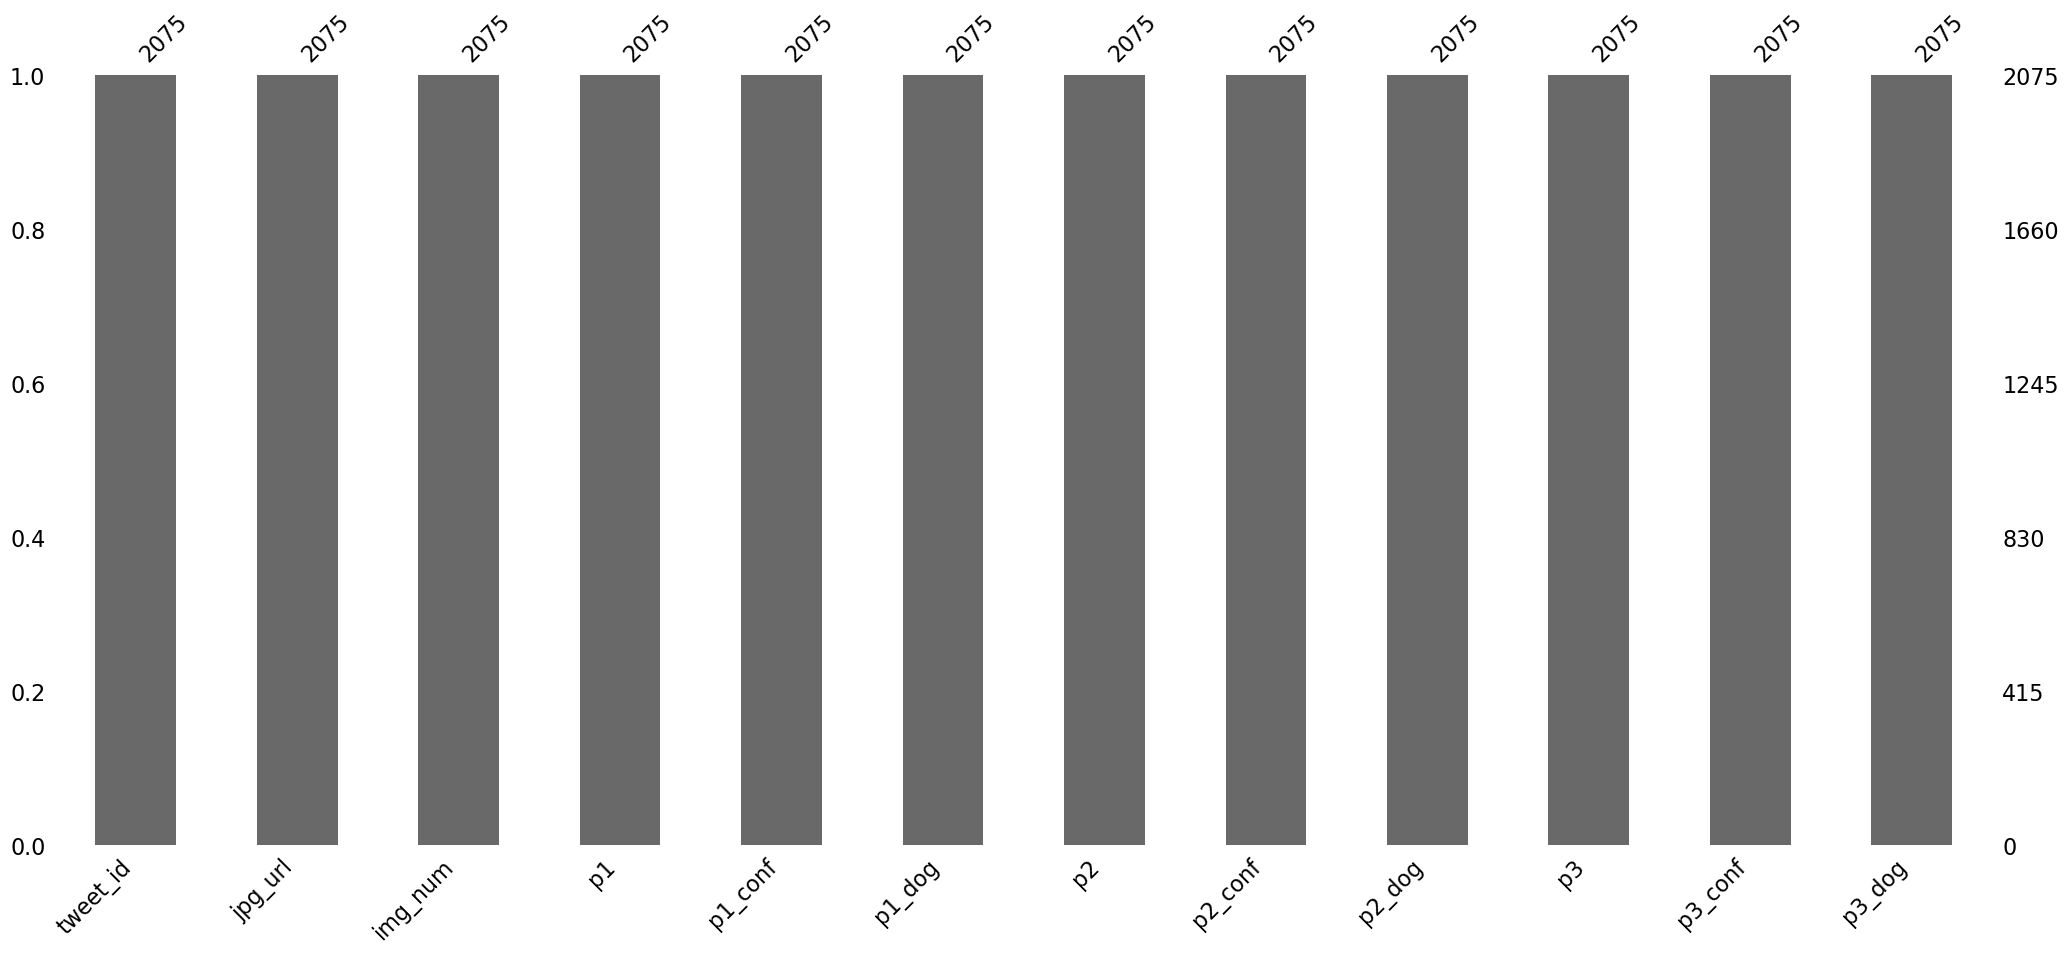

In [35]:
# Visualizing the number of non-missing values in image-predictions.tsv dataset.
msno.bar(image_pred_tsv_file)

In [36]:
# Checking the value_count under the 'jpg_url' column in the image-predictions.tsv dataset.
image_pred_tsv_file.jpg_url.value_counts()

https://pbs.twimg.com/media/CZhn-QAWwAASQan.jpg                                            2
https://pbs.twimg.com/media/Cq9guJ5WgAADfpF.jpg                                            2
https://pbs.twimg.com/ext_tw_video_thumb/807106774843039744/pu/img/8XZg1xW35Xp2J6JW.jpg    2
https://pbs.twimg.com/media/CU1zsMSUAAAS0qW.jpg                                            2
https://pbs.twimg.com/media/CsrjryzWgAAZY00.jpg                                            2
                                                                                          ..
https://pbs.twimg.com/media/CXrmMSpUwAAdeRj.jpg                                            1
https://pbs.twimg.com/media/CXrawAhWkAAWSxC.jpg                                            1
https://pbs.twimg.com/media/CXrIntsUsAEkv0d.jpg                                            1
https://pbs.twimg.com/media/CXqcOHCUQAAugTB.jpg                                            1
https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg                       

In [37]:
# Checking for any duplicated values under the 'jpg_url' column in the image-predictions.tsv dataset.
image_pred_tsv_file[image_pred_tsv_file.jpg_url.duplicated()]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1297,752309394570878976,https://pbs.twimg.com/ext_tw_video_thumb/675354114423808004/pu/img/qL1R_nGLqa6lmkOx.jpg,1,upright,0.303415,False,golden_retriever,0.181351,True,Brittany_spaniel,0.162084,True
1315,754874841593970688,https://pbs.twimg.com/media/CWza7kpWcAAdYLc.jpg,1,pug,0.272205,True,bull_mastiff,0.251530,True,bath_towel,0.116806,False
1333,757729163776290825,https://pbs.twimg.com/media/CWyD2HGUYAQ1Xa7.jpg,2,cash_machine,0.802333,False,schipperke,0.045519,True,German_shepherd,0.023353,True
1345,759159934323924993,https://pbs.twimg.com/media/CU1zsMSUAAAS0qW.jpg,1,Irish_terrier,0.254856,True,briard,0.227716,True,soft-coated_wheaten_terrier,0.223263,True
1349,759566828574212096,https://pbs.twimg.com/media/CkNjahBXAAQ2kWo.jpg,1,Labrador_retriever,0.967397,True,golden_retriever,0.016641,True,ice_bear,0.014858,False
...,...,...,...,...,...,...,...,...,...,...,...,...
1903,851953902622658560,https://pbs.twimg.com/media/C4KHj-nWQAA3poV.jpg,1,Staffordshire_bullterrier,0.757547,True,American_Staffordshire_terrier,0.149950,True,Chesapeake_Bay_retriever,0.047523,True
1944,861769973181624320,https://pbs.twimg.com/media/CzG425nWgAAnP7P.jpg,2,Arabian_camel,0.366248,False,house_finch,0.209852,False,cocker_spaniel,0.046403,True
1992,873697596434513921,https://pbs.twimg.com/media/DA7iHL5U0AA1OQo.jpg,1,laptop,0.153718,False,French_bulldog,0.099984,True,printer,0.077130,False
2041,885311592912609280,https://pbs.twimg.com/media/C4bTH6nWMAAX_bJ.jpg,1,Labrador_retriever,0.908703,True,seat_belt,0.057091,False,pug,0.011933,True


#### Extracted twitter API json csv 

In [38]:
# Reading the extracted twitter json csv file with retweet_count and favorite_count columns using pandas read_csv function.
twit_json_extract_csv_path = os.path.join(data_wrangling_directory,'tweet_json\\tweet_json_extract.csv')
twit_json_extract_csv= pd.read_csv(twit_json_extract_csv_path)
# Viewing the first 10 rows of the extracted twitter api json csv file i.e. twit_json_extract_csv data.
twit_json_extract_csv.head(10)

,tweet_id,retweet_count,favorite_count
0,892420643555336193,6847,32803
1,892177421306343426,5154,28351
2,891815181378084864,3403,21291
3,891689557279858688,7056,35758
4,891327558926688256,7567,34189
5,891087950875897856,2539,17219
6,890971913173991426,1616,10037
7,890729181411237888,15387,55157
8,890609185150312448,3542,23747
9,890240255349198849,5958,27070


In [39]:
# Viewing the last 10 rows of the twit_json_extract_csv data.
twit_json_extract_csv.tail(10)

,tweet_id,retweet_count,favorite_count
2316,666058600524156928,46,96
2317,666057090499244032,111,243
2318,666055525042405380,193,359
2319,666051853826850816,685,1004
2320,666050758794694657,49,110
2321,666049248165822465,36,85
2322,666044226329800704,113,242
2323,666033412701032449,35,97
2324,666029285002620928,39,110
2325,666020888022790149,416,2222


In [40]:
# Getting a summary information on the extracted twit_json_extract_csv data.
twit_json_extract_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2326 entries, 0 to 2325
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2326 non-null   int64
 1   retweet_count   2326 non-null   int64
 2   favorite_count  2326 non-null   int64
dtypes: int64(3)
memory usage: 54.6 KB


In [41]:
# Getting a descriptive summary of the twit_json_extract_csv data.
twit_json_extract_csv.describe()

,tweet_id,retweet_count,favorite_count
count,2.326000e+03,2326.000000,2326.000000
mean,7.417346e+17,2413.705503,6846.139725
std,6.816442e+16,4086.032119,10636.877478
min,6.660209e+17,0.000000,0.000000
25%,6.780814e+17,485.250000,1191.500000
50%,7.178159e+17,1122.000000,2963.000000
75%,7.986402e+17,2792.750000,8371.750000
max,8.924206e+17,69092.000000,141222.000000


In [42]:
# Displaying five (5) samples of the extracted twitter api json csv data.
twit_json_extract_csv.sample(5)

,tweet_id,retweet_count,favorite_count
1955,672898206762672129,349,765
2021,671488513339211776,405,861
1019,743253157753532416,1095,3825
45,883360690899218434,3005,19304
1357,700518061187723268,705,2323


In [43]:
# Checking for the total number of missing values per column of the twit_json_extract_csv data.
twit_json_extract_csv.isna().sum()

tweet_id          0
retweet_count     0
favorite_count    0
dtype: int64

<AxesSubplot:>

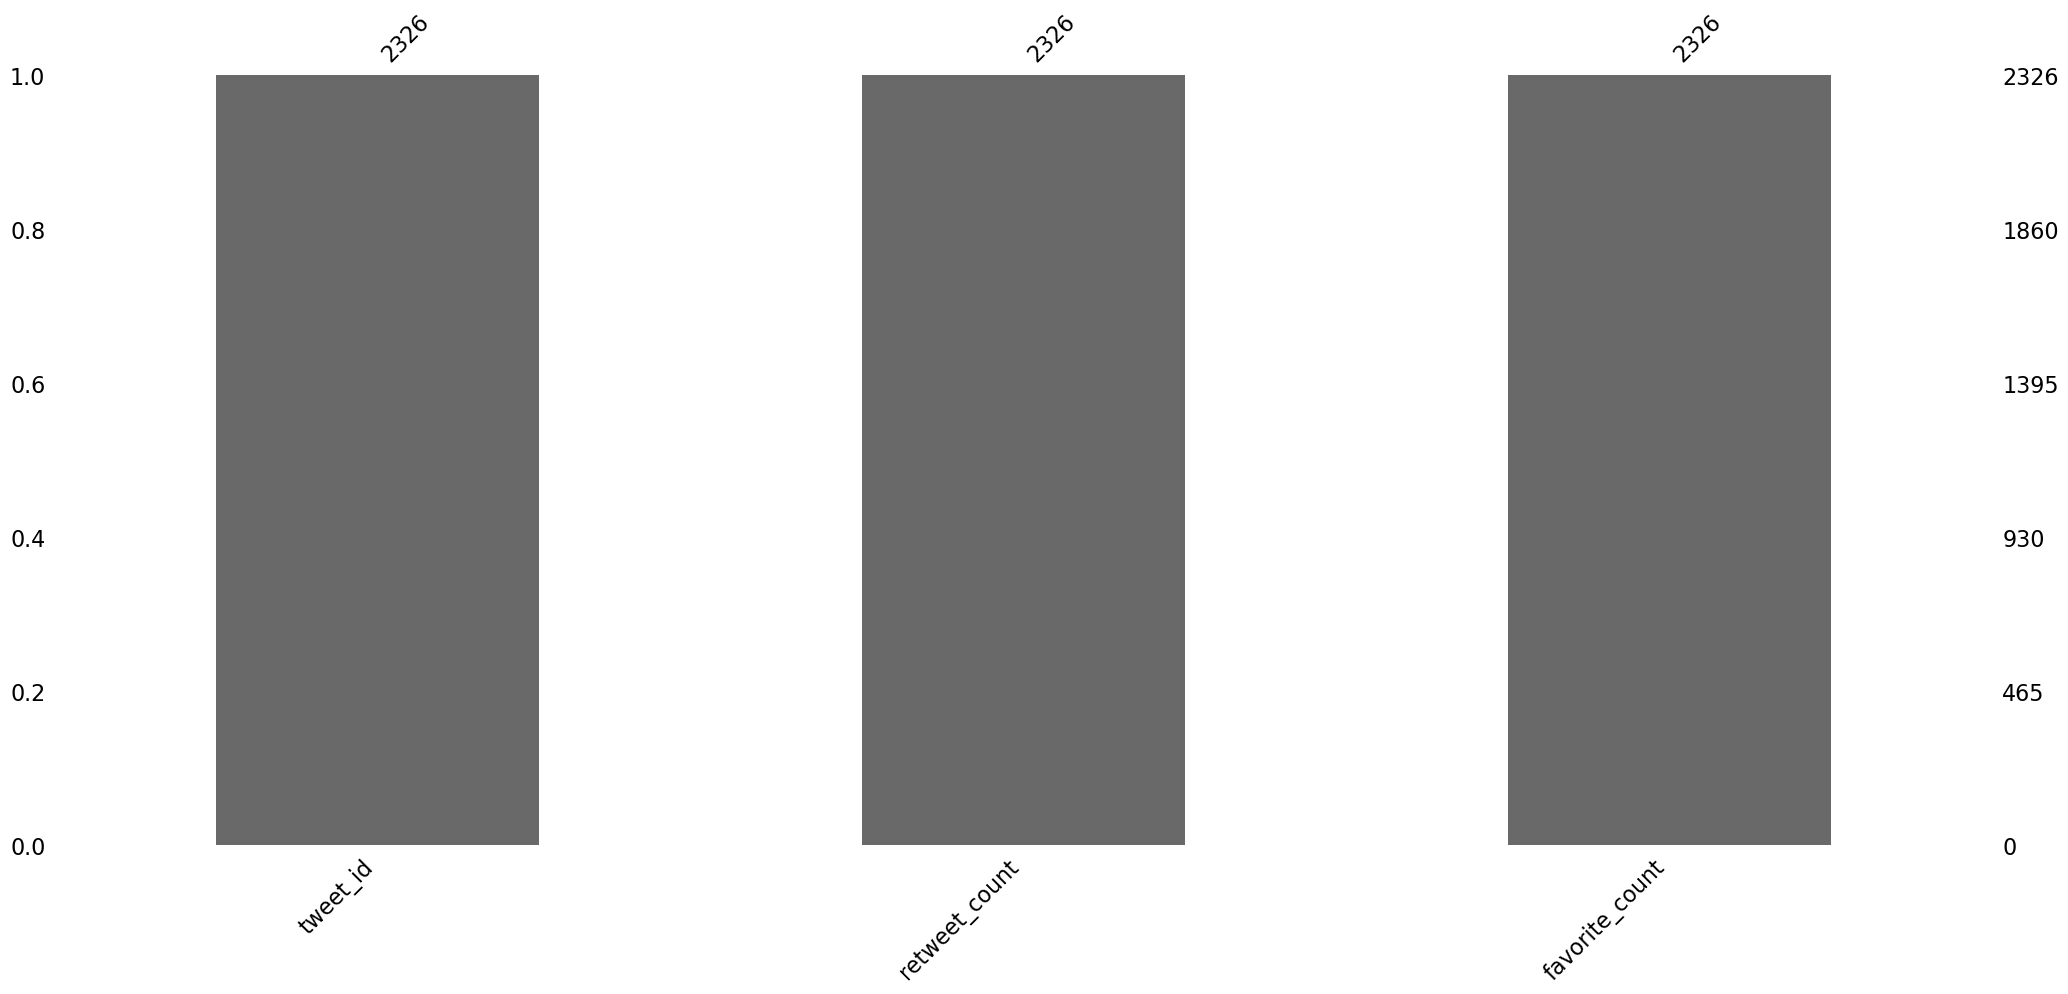

In [44]:
# Visualizing the number of non-missing values in twit_json_extracted_csv dataset.
msno.bar(twit_json_extract_csv)

In [45]:
# Displaying the value count for the 'retweet_count' column of the twit_json_extract_csv file.
twit_json_extract_csv.retweet_count.value_counts()

463     5
410     5
333     5
760     5
456     5
       ..
2501    1
3893    1
2298    1
1482    1
416     1
Name: retweet_count, Length: 1632, dtype: int64

In [46]:
# Checking for any duplicated values in the twit_json_extract_csv dataset.
twit_json_extract_csv[twit_json_extract_csv.retweet_count.duplicated()]

,tweet_id,retweet_count,favorite_count
75,878057613040115712,5592,35796
95,873213775632977920,1300,6122
120,868552278524837888,1704,8647
129,866334964761202691,11956,45213
143,863062471531167744,2037,7288
...,...,...,...
2320,666050758794694657,49,110
2321,666049248165822465,36,85
2322,666044226329800704,113,242
2323,666033412701032449,35,97


In [47]:
# Viewing the value count for the 'favorite_count' column of the extracted twit_json_extract_csv file.
twit_json_extract_csv.favorite_count.value_counts()

0       159
2230    4  
179     3  
2323    3  
472     3  
       ..  
5768    1  
6700    1  
4473    1  
6285    1  
2222    1  
Name: favorite_count, Length: 1961, dtype: int64

In [48]:
# Checking for any duplicated values in the extracted twitter api json csv dataset.
twit_json_extract_csv[twit_json_extract_csv.favorite_count.duplicated()]

,tweet_id,retweet_count,favorite_count
35,885311592912609280,15090,0
67,879130579576475649,5592,0
72,878404777348136964,1050,0
73,878316110768087041,5407,0
88,874680097055178752,3824,23757
...,...,...,...
2304,666293911632134144,288,416
2310,666099513787052032,53,131
2313,666073100786774016,129,270
2316,666058600524156928,46,96


### Quality issues

1. `twitter-archive-enhanced.csv`: Missing data found in the following columns; [in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp].

2. `twitter-archive-enhanced.csv`: No null entries are recorded for the dog names using the sum() and isna() function. 'None' is interpreted as a non-missing value.

3. `twitter-archive-enhanced.csv`: No null entries are returned for the dog stages (doggo, floofer, pupper, and puppo) using the sum() and isna() function. 'None' is interpreted as a non-missing value.

4. `twitter-archive-enhanced.csv`: Timestamp having an object/string data type rather than a timestamp and containing a string +0000 at the end.

5. `twitter-archive-enhanced.csv`: Rows containing retweeted text with duplicated entries using the value_counts() on the 'expand_url' column.

6. `twitter-archive-enhanced.csv`: expanded_urls column containing duplicated urls separated by ','. E.g.https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1 for tweet_id=891327558926688256.

7. `twitter-archive-enhanced.csv`: Wrong dog name under the 'name' column.

8. `image-predictions.tsv`: Inconsistent tweet id with twitter-archive-enhanced.csv.

9. `twit_json_extract_csv`: Inconsistent tweet id with twitter-archive-enhanced.csv and image-predictions.tsv.

### Tidiness issues

1. `twitter-archive-enhanced.csv`: Tidiness rule broken as the dog stage (doggo, floofer, pupper, and puppo) are broken into columns rather than placed in a single row.

2. `twitter-archive-enhanced.csv`, `image-predictions.tsv` and `twit_json_extract_csv`: The three tables should be merged into a single pandas dataframe.

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [49]:
# Make copies of original pieces of data
twit_arch_csv_copy=twit_arch_csv.copy()
image_pred_tsv_file_copy=image_pred_tsv_file.copy()
twit_json_extract_csv_copy=twit_json_extract_csv.copy()

### Issue #1: Missing Data

#### `twitter-archive-enhanced` / `twit_arch_csv`: Missing data found in the following columns, 'in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', and 'retweeted_status_timestamp'.

#### Define: 
Drop the following columns; in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp' since the null records are greater than (>) 70% of the total data.

#### Code

In [50]:
# Dropping columns with null values greater than (>) 70% of the total original data (2356) in the twitter-enhanced-csv file.
twit_arch_csv_copy = twit_arch_csv_copy.drop(['in_reply_to_status_id',\
                                              'in_reply_to_user_id',\
                                              'retweeted_status_id',\
                                              'retweeted_status_user_id',\
                                              'retweeted_status_timestamp'], axis=1)

#### Test

In [51]:
# Getting the summary information for the twitter-enhanced-csv file.
twit_arch_csv_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2356 non-null   int64 
 1   timestamp           2356 non-null   object
 2   source              2356 non-null   object
 3   text                2356 non-null   object
 4   expanded_urls       2297 non-null   object
 5   rating_numerator    2356 non-null   int64 
 6   rating_denominator  2356 non-null   int64 
 7   name                2356 non-null   object
 8   doggo               2356 non-null   object
 9   floofer             2356 non-null   object
 10  pupper              2356 non-null   object
 11  puppo               2356 non-null   object
dtypes: int64(3), object(9)
memory usage: 221.0+ KB


#### `twitter-archive-enhanced` / `twit_arch_csv`: No null entries are returned for the dog names using the sum() and isna() function. 'None' is interpreted as a non-missing value.

#### Define: 
Replace 'None' with 'NaN' for the dog names and drop rows with null values.

#### Code

In [52]:
# Replace 'None' with 'NaN' for the dog names.
twit_arch_csv_copy.name = twit_arch_csv_copy.name.replace('None', np.nan)

In [53]:
# Drop empty rows with null values/records.
twit_arch_csv_copy = twit_arch_csv_copy.dropna(axis=0, how='any')

#### Test

In [54]:
# Checking the number of null values under the dog name column.
twit_arch_csv_copy.isna().sum()

tweet_id              0
timestamp             0
source                0
text                  0
expanded_urls         0
rating_numerator      0
rating_denominator    0
name                  0
doggo                 0
floofer               0
pupper                0
puppo                 0
dtype: int64

In [55]:
# Viewing the value_count for the 'name' column under the twitter-enhanced-csv file.
twit_arch_csv_copy.name.value_counts()

a             55
Charlie       12
Oliver        11
Cooper        11
Lucy          11
              ..
Aqua          1 
Chase         1 
Meatball      1 
Rorie         1 
Christoper    1 
Name: name, Length: 956, dtype: int64

#### `twitter-archive-enhanced` / `twit_arch_csv`: No null entries are returned for the dog stages (doggo, floofer, pupper, and puppo) using the sum() and isna() function. 'None' is interpreted as a non-missing value.

#### Define: 
Replace 'None' with 'NaN' for the dog stages (doggo, floofer, pupper, and puppo).

#### Code

In [56]:
# Replace 'None' with 'NaN' for the dog stages (doggo, floofer, pupper, and puppo).
for i in ['doggo', 'floofer', 'pupper', 'puppo']:
    twit_arch_csv_copy[i]=twit_arch_csv_copy[i].replace('None', np.nan)

#### Test

In [57]:
# Checking the number of null values in dog stage.
# The missing dog stage values will be handled after combining them into a single column named 'stage'.
twit_arch_csv_copy.isna().sum()

tweet_id              0   
timestamp             0   
source                0   
text                  0   
expanded_urls         0   
rating_numerator      0   
rating_denominator    0   
name                  0   
doggo                 1558
floofer               1606
pupper                1463
puppo                 1591
dtype: int64

In [58]:
# Viewing the first 5 rows of the twitter-enhanced-csv data.
twit_arch_csv_copy.head(5)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,NaN,NaN,NaN,NaN
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,NaN,NaN,NaN,NaN
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,NaN,NaN,NaN,NaN
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,NaN,NaN,NaN,NaN
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,NaN,NaN,NaN,NaN


### Issue #2: Tidiness issue

#### `twitter-archive-enhanced` / `twit_arch_csv` : Tidiness rule broken as the dog stage (doggo, floofer, pupper, and puppo) into columns rather than being placed in a single row.

#### Define:
Combine the different dog stage columns (doggo, floofer, pupper, and puppo) into a single row. Drop the different columns since it has been replaced with a single column named 'stage'.

#### Code

In [59]:
# Combining columns [doggo, floofer, pupper, and puppo] into a single column named 'stage'.
twit_arch_csv_copy['stage']=twit_arch_csv_copy.doggo + twit_arch_csv_copy.floofer + twit_arch_csv_copy.pupper + twit_arch_csv_copy.puppo
twit_arch_csv_copy.loc[twit_arch_csv_copy.doggo== 'doggo', 'stage'] = 'doggo'
twit_arch_csv_copy.loc[twit_arch_csv_copy.floofer == 'floofer', 'stage'] = 'floofer'
twit_arch_csv_copy.loc[twit_arch_csv_copy.pupper == 'pupper', 'stage'] = 'pupper'
twit_arch_csv_copy.loc[twit_arch_csv_copy.puppo == 'puppo', 'stage'] = 'puppo'
twit_arch_csv_copy.loc[twit_arch_csv_copy.stage=='NaNNaNNaNNaN', 'stage'] = np.nan

# Reference:https://knowledge.udacity.com/questions/40340

In [60]:
# Dropping columns [doggo, floofer, pupper, and puppo] since it has been replaced with a single column named 'stage'.
twit_arch_csv_copy = twit_arch_csv_copy.drop(['doggo',\
                                              'floofer',\
                                              'pupper',\
                                              'puppo'
                                              ], axis=1)

#### Test

In [61]:
# Getting the summary information.
twit_arch_csv_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1611 entries, 0 to 2354
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            1611 non-null   int64 
 1   timestamp           1611 non-null   object
 2   source              1611 non-null   object
 3   text                1611 non-null   object
 4   expanded_urls       1611 non-null   object
 5   rating_numerator    1611 non-null   int64 
 6   rating_denominator  1611 non-null   int64 
 7   name                1611 non-null   object
 8   stage               220 non-null    object
dtypes: int64(3), object(6)
memory usage: 125.9+ KB


In [62]:
# Viewing the first 5 rows of the twitter-enhanced-csv data.
twit_arch_csv_copy.head(5)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,NaN
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,NaN
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,NaN
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,NaN
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,NaN


#### Define: 
Drop rows with null values since the 'stage' column has missing records.

#### Code

In [63]:
#  Dropping any empty rows or rows with null values.
twit_arch_csv_copy = twit_arch_csv_copy.dropna(axis=0, how='any')

#### Test

In [64]:
# Checking the summary information.
twit_arch_csv_copy.info() # Some rows have the 'stage' column as NaN. This would be dropped.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 220 entries, 9 to 2017
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            220 non-null    int64 
 1   timestamp           220 non-null    object
 2   source              220 non-null    object
 3   text                220 non-null    object
 4   expanded_urls       220 non-null    object
 5   rating_numerator    220 non-null    int64 
 6   rating_denominator  220 non-null    int64 
 7   name                220 non-null    object
 8   stage               220 non-null    object
dtypes: int64(3), object(6)
memory usage: 17.2+ KB


In [65]:
# Checking the number of null values.
twit_arch_csv_copy.isna().sum()

tweet_id              0
timestamp             0
source                0
text                  0
expanded_urls         0
rating_numerator      0
rating_denominator    0
name                  0
stage                 0
dtype: int64

In [66]:
# Viewing the first 5 rows of the twitter-archive-enhanced.csv file.
twit_arch_csv_copy.head(5)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage
9,890240255349198849,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Cassie. She is a college pup. Studying international doggo communication and stick theory. 14/10 so elegant much sophisticate https://t.co/t1bfwz5S2A,https://twitter.com/dog_rates/status/890240255349198849/photo/1,14,10,Cassie,doggo
14,889531135344209921,2017-07-24 17:02:04 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Stuart. He's sporting his favorite fanny pack. Secretly filled with bones only. 13/10 puppared puppo #BarkWeek https://t.co/y70o6h3isq,https://twitter.com/dog_rates/status/889531135344209921/photo/1,13,10,Stuart,puppo
29,886366144734445568,2017-07-15 23:25:31 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Roscoe. Another pupper fallen victim to spontaneous tongue ejections. Get the BlepiPen immediate. 12/10 deep breaths Roscoe https://t.co/RGE08MIJox,"https://twitter.com/dog_rates/status/886366144734445568/photo/1,https://twitter.com/dog_rates/status/886366144734445568/photo/1",12,10,Roscoe,pupper
43,884162670584377345,2017-07-09 21:29:42 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Yogi. He doesn't have any important dog meetings today he just enjoys looking his best at all times. 12/10 for dangerously dapper doggo https://t.co/YSI00BzTBZ,https://twitter.com/dog_rates/status/884162670584377345/photo/1,12,10,Yogi,doggo
46,883360690899218434,2017-07-07 16:22:55 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Grizzwald. He may be the floofiest floofer I ever did see. Lost eyes saving a schoolbus from a volcano erpuption. 13/10 heroic as h*ck https://t.co/rf661IFEYP,https://twitter.com/dog_rates/status/883360690899218434/photo/1,13,10,Grizzwald,floofer


In [67]:
# Viewing the last 5 rows of the twitter-archive-enhanced.csv file.
twit_arch_csv_copy.tail(5)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage
1995,672594978741354496,2015-12-04 01:55:13 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Scott. Just trying to catch his train to work. Doesn't need everybody staring. 9/10 ignore the haters pupper https://t.co/jyXbZ35MYz,https://twitter.com/dog_rates/status/672594978741354496/photo/1,9,10,Scott,pupper
2002,672481316919734272,2015-12-03 18:23:34 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Say hello to Jazz. She should be on the cover of Vogue. 12/10 gorgeous pupper https://t.co/mVCMemhXAP,https://twitter.com/dog_rates/status/672481316919734272/photo/1,12,10,Jazz,pupper
2009,672254177670729728,2015-12-03 03:21:00 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Rolf. He's having the time of his life. 11/10 good pupper https://t.co/OO6MqEbqG3,https://twitter.com/dog_rates/status/672254177670729728/photo/1,11,10,Rolf,pupper
2015,672205392827572224,2015-12-03 00:07:09 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Opal. He's a Royal John Coctostan. Ready for transport. Basically indestructible. 9/10 good pupper https://t.co/yRBQF9OS7D,https://twitter.com/dog_rates/status/672205392827572224/photo/1,9,10,Opal,pupper
2017,672160042234327040,2015-12-02 21:06:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Bubba. He's a Titted Peebles Aorta. Evolutionary masterpiece. Comfortable with his body. 8/10 great pupper https://t.co/aNkkl5nH3W,https://twitter.com/dog_rates/status/672160042234327040/photo/1,8,10,Bubba,pupper


### Issue #3: Quality issue

#### `twitter-archive-enhanced` / `twit_arch_csv` : Timestamp having an object/string data type rather than a timestamp and containing a string +0000 at the end.

#### Define:  
Remove '+0000' string at the end of each record in the 'timestamp' column and convert remaining record from strings to timestamp datatype. 

#### Code

In [68]:
# Removing '+0000' string at  the end of each timestamp data and converting from strings to timestamp datatypes. 
for stamp in list(twit_arch_csv_copy.timestamp):
    extract_zero_stamp=pd.Timestamp(stamp.split('+')[0])
    twit_arch_csv_copy.timestamp=twit_arch_csv_copy.timestamp.replace(stamp, extract_zero_stamp)

#### Test

In [69]:
# Getting the summary information.
twit_arch_csv_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 220 entries, 9 to 2017
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            220 non-null    int64         
 1   timestamp           220 non-null    datetime64[ns]
 2   source              220 non-null    object        
 3   text                220 non-null    object        
 4   expanded_urls       220 non-null    object        
 5   rating_numerator    220 non-null    int64         
 6   rating_denominator  220 non-null    int64         
 7   name                220 non-null    object        
 8   stage               220 non-null    object        
dtypes: datetime64[ns](1), int64(3), object(5)
memory usage: 17.2+ KB


In [70]:
# Viewing the first 5 rows of the twitter-enhanced-csv data.
twit_arch_csv_copy.head(5)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage
9,890240255349198849,2017-07-26 15:59:51,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Cassie. She is a college pup. Studying international doggo communication and stick theory. 14/10 so elegant much sophisticate https://t.co/t1bfwz5S2A,https://twitter.com/dog_rates/status/890240255349198849/photo/1,14,10,Cassie,doggo
14,889531135344209921,2017-07-24 17:02:04,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Stuart. He's sporting his favorite fanny pack. Secretly filled with bones only. 13/10 puppared puppo #BarkWeek https://t.co/y70o6h3isq,https://twitter.com/dog_rates/status/889531135344209921/photo/1,13,10,Stuart,puppo
29,886366144734445568,2017-07-15 23:25:31,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Roscoe. Another pupper fallen victim to spontaneous tongue ejections. Get the BlepiPen immediate. 12/10 deep breaths Roscoe https://t.co/RGE08MIJox,"https://twitter.com/dog_rates/status/886366144734445568/photo/1,https://twitter.com/dog_rates/status/886366144734445568/photo/1",12,10,Roscoe,pupper
43,884162670584377345,2017-07-09 21:29:42,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Yogi. He doesn't have any important dog meetings today he just enjoys looking his best at all times. 12/10 for dangerously dapper doggo https://t.co/YSI00BzTBZ,https://twitter.com/dog_rates/status/884162670584377345/photo/1,12,10,Yogi,doggo
46,883360690899218434,2017-07-07 16:22:55,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Grizzwald. He may be the floofiest floofer I ever did see. Lost eyes saving a schoolbus from a volcano erpuption. 13/10 heroic as h*ck https://t.co/rf661IFEYP,https://twitter.com/dog_rates/status/883360690899218434/photo/1,13,10,Grizzwald,floofer


In [71]:
# Viewing the last 5 rows of the twitter-enhanced-csv data.
twit_arch_csv_copy.tail(5)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage
1995,672594978741354496,2015-12-04 01:55:13,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Scott. Just trying to catch his train to work. Doesn't need everybody staring. 9/10 ignore the haters pupper https://t.co/jyXbZ35MYz,https://twitter.com/dog_rates/status/672594978741354496/photo/1,9,10,Scott,pupper
2002,672481316919734272,2015-12-03 18:23:34,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Say hello to Jazz. She should be on the cover of Vogue. 12/10 gorgeous pupper https://t.co/mVCMemhXAP,https://twitter.com/dog_rates/status/672481316919734272/photo/1,12,10,Jazz,pupper
2009,672254177670729728,2015-12-03 03:21:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Rolf. He's having the time of his life. 11/10 good pupper https://t.co/OO6MqEbqG3,https://twitter.com/dog_rates/status/672254177670729728/photo/1,11,10,Rolf,pupper
2015,672205392827572224,2015-12-03 00:07:09,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Opal. He's a Royal John Coctostan. Ready for transport. Basically indestructible. 9/10 good pupper https://t.co/yRBQF9OS7D,https://twitter.com/dog_rates/status/672205392827572224/photo/1,9,10,Opal,pupper
2017,672160042234327040,2015-12-02 21:06:56,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Bubba. He's a Titted Peebles Aorta. Evolutionary masterpiece. Comfortable with his body. 8/10 great pupper https://t.co/aNkkl5nH3W,https://twitter.com/dog_rates/status/672160042234327040/photo/1,8,10,Bubba,pupper


#### `twitter-archive-enhanced` / `twit_arch_csv`: Rows containing retweeted text with duplicated entries using the value_counts() on the 'expand_url' column..

#### Define: 

Get rows with retweeted text from the 'text' column and append them to a list named 'retweet_text'. Then, drop these rows.

#### Code

In [72]:
# Getting rows with retweeted text from the 'text' column and appending to 'retweet_text' list.
retweet_text=[]
for i in list(twit_arch_csv_copy.text):
    if i.startswith('RT'):
        retweet_text.append(i)
        print(i)

RT @dog_rates: This is Sierra. She's one precious pupper. Absolute 12/10. Been in and out of ICU her whole life. Help Sierra below

https:/…
RT @dog_rates: This is Jamesy. He gives a kiss to every other pupper he sees on his walk. 13/10 such passion, much tender https://t.co/wk7T…
RT @dog_rates: This is Astrid. She's a guide doggo in training. 13/10 would follow anywhere https://t.co/xo7FZFIAao
RT @dog_rates: This is Gidget. She's a spy pupper. Stealthy as h*ck. Must've slipped pup and got caught. 12/10 would forgive then pet https…
RT @dog_rates: This is Loki. He smiles like Elvis. Ain't nothin but a hound doggo. 12/10 https://t.co/QV5nx6otZR
RT @dog_rates: Say hello to Pablo. He's one gorgeous puppo. A true 12/10. Click the link to see why Pablo requests your assistance

https:/…
RT @dog_rates: This is Sampson. He just graduated. Ready to be a doggo now. Time for the real world. 12/10 have fun with taxes https://t.co…
RT @dog_rates: This is Oliver. He has dreams of being a service pu

In [73]:
# Checking the total number of retweeted text.
len(retweet_text)

22

In [74]:
# Dropping rows with retweeted text.
for i in list(twit_arch_csv_copy.text):
    if i in retweet_text:
        twit_arch_csv_copy = twit_arch_csv_copy[twit_arch_csv_copy.text != i]

#### Test

In [75]:
# Checking if any retweeted text exist under the 'text' column.
for i in list(twit_arch_csv_copy.text):
    if i in retweet_text:
        print('Retweet data found.') # None exist.

In [76]:
# Viewing the first 5 rows of the twitter-enhanced-csv data.
twit_arch_csv_copy.head(5)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage
9,890240255349198849,2017-07-26 15:59:51,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Cassie. She is a college pup. Studying international doggo communication and stick theory. 14/10 so elegant much sophisticate https://t.co/t1bfwz5S2A,https://twitter.com/dog_rates/status/890240255349198849/photo/1,14,10,Cassie,doggo
14,889531135344209921,2017-07-24 17:02:04,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Stuart. He's sporting his favorite fanny pack. Secretly filled with bones only. 13/10 puppared puppo #BarkWeek https://t.co/y70o6h3isq,https://twitter.com/dog_rates/status/889531135344209921/photo/1,13,10,Stuart,puppo
29,886366144734445568,2017-07-15 23:25:31,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Roscoe. Another pupper fallen victim to spontaneous tongue ejections. Get the BlepiPen immediate. 12/10 deep breaths Roscoe https://t.co/RGE08MIJox,"https://twitter.com/dog_rates/status/886366144734445568/photo/1,https://twitter.com/dog_rates/status/886366144734445568/photo/1",12,10,Roscoe,pupper
43,884162670584377345,2017-07-09 21:29:42,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Yogi. He doesn't have any important dog meetings today he just enjoys looking his best at all times. 12/10 for dangerously dapper doggo https://t.co/YSI00BzTBZ,https://twitter.com/dog_rates/status/884162670584377345/photo/1,12,10,Yogi,doggo
46,883360690899218434,2017-07-07 16:22:55,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Grizzwald. He may be the floofiest floofer I ever did see. Lost eyes saving a schoolbus from a volcano erpuption. 13/10 heroic as h*ck https://t.co/rf661IFEYP,https://twitter.com/dog_rates/status/883360690899218434/photo/1,13,10,Grizzwald,floofer


In [77]:
# Getting the value count for the 'expanded_urls' column of the twitter-enhanced-csv data.
twit_arch_csv_copy.expanded_urls.value_counts()

https://twitter.com/dog_rates/status/890240255349198849/photo/1                                                                                                                                                                                                    1
https://twitter.com/dog_rates/status/704347321748819968/photo/1                                                                                                                                                                                                    1
https://twitter.com/dog_rates/status/702598099714314240/photo/1                                                                                                                                                                                                    1
https://twitter.com/dog_rates/status/701545186879471618/photo/1                                                                                                                                                          

In [78]:
# Checking for duplicates.
twit_arch_csv_copy[twit_arch_csv_copy.expanded_urls.duplicated()]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage


#### `twitter-archive-enhanced` / `twit_arch_csv`: some expanded_urls column containing duplicated urls separated by ',' under the twitter-archive-enhanced.csv.

#### Define: 
Remove the comma(,) punctuation and update the 'expanded_urls' column with (one) correct url per row, hence removing duplicate urls in a single row.

#### Code

In [79]:
# Removing the commas and updating the expanded_urls column with the correct url.
for url in list(twit_arch_csv_copy.expanded_urls):
    if ',' in url:
        new_url=url.split(',')[-1]
        twit_arch_csv_copy.expanded_urls=twit_arch_csv_copy.expanded_urls.replace(url, new_url)

# Reference: https://www.w3schools.com/python/pandas/ref_df_replace.asp#

#### Test

In [80]:
# Checking if any comma exist in each url under the 'expanded_urls' column.
for url in list(twit_arch_csv_copy.expanded_urls):
    if ',' in url:
        print('Url separated by comma exists under the expanded_urls column.')

In [81]:
# Viewing the value_count of the 'expanded_urls' column of the twitter-enhanced-csv data.
twit_arch_csv_copy.expanded_urls.value_counts()

https://twitter.com/dog_rates/status/890240255349198849/photo/1    1
https://twitter.com/dog_rates/status/704347321748819968/photo/1    1
https://twitter.com/dog_rates/status/702598099714314240/photo/1    1
https://twitter.com/dog_rates/status/701545186879471618/photo/1    1
https://twitter.com/dog_rates/status/700864154249383937/photo/1    1
                                                                  ..
https://twitter.com/dog_rates/status/775733305207554048/photo/1    1
https://twitter.com/dog_rates/status/775364825476165632/photo/1    1
https://twitter.com/dog_rates/status/773985732834758656/photo/1    1
https://twitter.com/dog_rates/status/773547596996571136/photo/1    1
https://twitter.com/dog_rates/status/672160042234327040/photo/1    1
Name: expanded_urls, Length: 198, dtype: int64

In [82]:
# Viewing the first 10 rows of the twitter-enhanced-csv data.
twit_arch_csv_copy.head(10)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage
9,890240255349198849,2017-07-26 15:59:51,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Cassie. She is a college pup. Studying international doggo communication and stick theory. 14/10 so elegant much sophisticate https://t.co/t1bfwz5S2A,https://twitter.com/dog_rates/status/890240255349198849/photo/1,14,10,Cassie,doggo
14,889531135344209921,2017-07-24 17:02:04,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Stuart. He's sporting his favorite fanny pack. Secretly filled with bones only. 13/10 puppared puppo #BarkWeek https://t.co/y70o6h3isq,https://twitter.com/dog_rates/status/889531135344209921/photo/1,13,10,Stuart,puppo
29,886366144734445568,2017-07-15 23:25:31,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Roscoe. Another pupper fallen victim to spontaneous tongue ejections. Get the BlepiPen immediate. 12/10 deep breaths Roscoe https://t.co/RGE08MIJox,https://twitter.com/dog_rates/status/886366144734445568/photo/1,12,10,Roscoe,pupper
43,884162670584377345,2017-07-09 21:29:42,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Yogi. He doesn't have any important dog meetings today he just enjoys looking his best at all times. 12/10 for dangerously dapper doggo https://t.co/YSI00BzTBZ,https://twitter.com/dog_rates/status/884162670584377345/photo/1,12,10,Yogi,doggo
46,883360690899218434,2017-07-07 16:22:55,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Grizzwald. He may be the floofiest floofer I ever did see. Lost eyes saving a schoolbus from a volcano erpuption. 13/10 heroic as h*ck https://t.co/rf661IFEYP,https://twitter.com/dog_rates/status/883360690899218434/photo/1,13,10,Grizzwald,floofer
49,882762694511734784,2017-07-06 00:46:41,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Gus. He's quite the cheeky pupper. Already perfected the disinterested wink. 12/10 would let steal my girl https://t.co/D43I96SlVu,https://twitter.com/dog_rates/status/882762694511734784/photo/1,12,10,Gus,pupper
56,881536004380872706,2017-07-02 15:32:16,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here is a pupper approaching maximum borkdrive. Zooming at never before seen speeds. 14/10 paw-inspiring af \n(IG: puffie_the_chow) https://t.co/ghXBIIeQZF,https://twitter.com/dog_rates/status/881536004380872706/video/1,14,10,a,pupper
71,878776093423087618,2017-06-25 00:45:22,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Snoopy. He's a proud #PrideMonthPuppo. Impeccable handwriting for not having thumbs. 13/10 would love back #PrideMonth https://t.co/lNZwgNO4gS,https://twitter.com/dog_rates/status/878776093423087618/photo/1,13,10,Snoopy,puppo
82,876838120628539392,2017-06-19 16:24:33,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Ginger. She's having a ruff Monday. Too many pupper things going on. H*ckin exhausting. 12/10 would snug passionately https://t.co/j211oCDRs6,https://twitter.com/dog_rates/status/876838120628539392/photo/1,12,10,Ginger,pupper
92,874296783580663808,2017-06-12 16:06:11,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Jed. He may be the fanciest pupper in the game right now. Knows it too. 13/10 would sign modeling contract https://t.co/0YplNnSMEm,https://twitter.com/dog_rates/status/874296783580663808/photo/1,13,10,Jed,pupper


In [83]:
# Displaying the last ten(10) rows of the twitter-enhanced-csv data.
twit_arch_csv_copy.tail(10)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage
1977,672988786805112832,2015-12-05 04:00:04,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Schnozz. He's had a blurred tail since birth. Hasn't let that stop him. 10/10 inspirational pupper https://t.co/a3zYMcvbXG,https://twitter.com/dog_rates/status/672988786805112832/photo/1,10,10,Schnozz,pupper
1980,672975131468300288,2015-12-05 03:05:49,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Chuckles. He is one skeptical pupper. 10/10 stay woke Chuckles https://t.co/ZlcF0TIRW1,https://twitter.com/dog_rates/status/672975131468300288/photo/1,10,10,Chuckles,pupper
1981,672970152493887488,2015-12-05 02:46:02,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Chet. He's having a hard time. Really struggling. 7/10 hang in there pupper https://t.co/eb4ta0xtnd,https://twitter.com/dog_rates/status/672970152493887488/photo/1,7,10,Chet,pupper
1985,672898206762672129,2015-12-04 22:00:08,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Cheryl AKA Queen Pupper of the Skies. Experienced fighter pilot. Much skill. True hero. 11/10 https://t.co/i4XJEWwdsp,https://twitter.com/dog_rates/status/672898206762672129/photo/1,11,10,Cheryl,pupper
1992,672614745925664768,2015-12-04 03:13:46,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Norman. Doesn't bark much. Very docile pup. Up to date on current events. Overall nifty pupper. 6/10 https://t.co/ntxsR98f3U,https://twitter.com/dog_rates/status/672614745925664768/photo/1,6,10,Norman,pupper
1995,672594978741354496,2015-12-04 01:55:13,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Scott. Just trying to catch his train to work. Doesn't need everybody staring. 9/10 ignore the haters pupper https://t.co/jyXbZ35MYz,https://twitter.com/dog_rates/status/672594978741354496/photo/1,9,10,Scott,pupper
2002,672481316919734272,2015-12-03 18:23:34,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Say hello to Jazz. She should be on the cover of Vogue. 12/10 gorgeous pupper https://t.co/mVCMemhXAP,https://twitter.com/dog_rates/status/672481316919734272/photo/1,12,10,Jazz,pupper
2009,672254177670729728,2015-12-03 03:21:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Rolf. He's having the time of his life. 11/10 good pupper https://t.co/OO6MqEbqG3,https://twitter.com/dog_rates/status/672254177670729728/photo/1,11,10,Rolf,pupper
2015,672205392827572224,2015-12-03 00:07:09,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Opal. He's a Royal John Coctostan. Ready for transport. Basically indestructible. 9/10 good pupper https://t.co/yRBQF9OS7D,https://twitter.com/dog_rates/status/672205392827572224/photo/1,9,10,Opal,pupper
2017,672160042234327040,2015-12-02 21:06:56,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Bubba. He's a Titted Peebles Aorta. Evolutionary masterpiece. Comfortable with his body. 8/10 great pupper https://t.co/aNkkl5nH3W,https://twitter.com/dog_rates/status/672160042234327040/photo/1,8,10,Bubba,pupper


#### `twitter-archive-enhanced` / `twit_arch_csv`: Rows containing a wrong record for dog name under the 'name' column.

#### Define: 
Get all dog names recorded under the 'name' column. Select and drop rows with wrong dog names.

#### Code

In [84]:
# Getting all dog names recorded under the 'name' column.
set(list(twit_arch_csv_copy.name))

{'Abby',
 'Adele',
 'Albert',
 'Ambrose',
 'Anakin',
 'Aqua',
 'Ashleigh',
 'Astrid',
 'Ava',
 'Baloo',
 'Banjo',
 'Barney',
 'Bayley',
 'Bella',
 'Benji',
 'Betty',
 'Birf',
 'Blakely',
 'Blu',
 'Bo',
 'Bones',
 'Boomer',
 'Brandy',
 'Bubba',
 'Buckley',
 'Cassie',
 'Charlie',
 'Chelsea',
 'Cheryl',
 'Chet',
 'Chubbs',
 'Chuckles',
 'Clark',
 'Clyde',
 'Combo',
 'Cooper',
 'Craig',
 'Cupid',
 'Curtis',
 'Deacon',
 'Derek',
 'Dido',
 'Diogi',
 'Divine',
 'Django',
 'Doc',
 'Doobert',
 'Duchess',
 'Dwight',
 'Edmund',
 'Ellie',
 'Emanuel',
 'Eve',
 'Finley',
 'Finn',
 'Finnegus',
 'Fletcher',
 'Gabe',
 'Gerald',
 'Gerbald',
 'Gidget',
 'Ginger',
 'Gizmo',
 'Godzilla',
 'Grady',
 'Grizzwald',
 'Gus',
 'Hamrick',
 'Hector',
 'Herschel',
 'Hubertson',
 'Huck',
 'Jamesy',
 'Jax',
 'Jazz',
 'Jed',
 'Jeffri',
 'Kaiya',
 'Kawhi',
 'Kellogg',
 'Kilo',
 'Kona',
 'Kyle',
 'Laika',
 'Larry',
 'Lennon',
 'Lenox',
 'Lillie',
 'Lily',
 'Lizzie',
 'Loki',
 'Lola',
 'Lorenzo',
 'Louie',
 'Lucy',
 'Luth

In [85]:
# Selecting all wrong dog names used under the 'name' column.
wrong_dog_names=sorted(list(set(list(twit_arch_csv_copy.name))))[-8:]
wrong_dog_names

['a', 'actually', 'all', 'his', 'just', 'mad', 'one', 'the']

In [86]:
# Displaying 12 samples with wrong dog names from the twitter-archive-enhanced csv file.

dog_list_with_wrong_names = []
for i in wrong_dog_names:   
    tweet_id = twit_arch_csv_copy[twit_arch_csv_copy.name==i].tweet_id
    text = twit_arch_csv_copy[twit_arch_csv_copy.name==i].text
    expanded_urls = twit_arch_csv_copy[twit_arch_csv_copy.name==i].expanded_urls
    rating_numerator = twit_arch_csv_copy[twit_arch_csv_copy.name==i].rating_numerator
    rating_denominator = twit_arch_csv_copy[twit_arch_csv_copy.name==i].rating_denominator
    name = twit_arch_csv_copy[twit_arch_csv_copy.name==i].name
    stage = twit_arch_csv_copy[twit_arch_csv_copy.name==i].stage
    # Append to list of dictionaries
    for t_id,tweet_text,url,rate_num,rate_den,dog_name,dog_stage in zip(tweet_id, \
                                                                        text, \
                                                                        expanded_urls,\
                                                                        rating_numerator, \
                                                                        rating_denominator, \
                                                                        name, \
                                                                        stage):
        dog_list_with_wrong_names.append({'tweet_id':t_id,
                        'text':tweet_text,
                        'expanded_urls':url,
                        'rating_numerator':rate_num,
                        'rating_denominator':rate_den,
                        'name':dog_name,
                        'stage':dog_stage
                        })
# Creating a pandas dataframe.
dog_list_with_wrong_names_df = pd.DataFrame(dog_list_with_wrong_names,\
                                            columns=['tweet_id', 'text', 'expanded_urls', 'rating_numerator',\
                                                     'rating_denominator', 'name', 'stage'])
# Displaying 12 random samples or rows from the twitter-enhanced-csv dataframe.
dog_list_with_wrong_names_df.sample(12)

,tweet_id,text,expanded_urls,rating_numerator,rating_denominator,name,stage
8,695095422348574720,This is just a beautiful pupper good shit evolution. 12/10 https://t.co/2L8pI0Z2Ib,https://twitter.com/dog_rates/status/695095422348574720/photo/1,12,10,just,pupper
6,748692773788876800,That is Quizno. This is his beach. He does not tolerate human shenanigans on his beach. 10/10 reclaim ur land doggo https://t.co/vdr7DaRSa7,https://twitter.com/dog_rates/status/748692773788876800/photo/1,10,10,his,doggo
5,728035342121635841,This is all I want in my life. 12/10 for super sleepy pupper https://t.co/4RlLA5ObMh,https://twitter.com/dog_rates/status/728035342121635841/photo/1,12,10,all,pupper
13,677269281705472000,This is the happiest pupper I've ever seen. 10/10 would trade lives with https://t.co/ep8ATEJwRb,https://twitter.com/dog_rates/status/677269281705472000/photo/1,10,10,the,pupper
4,744223424764059648,This is actually a pupper and I'd pet it so well. 12/10\nhttps://t.co/RNqS7C4Y4N,https://twitter.com/strange_animals/status/672108316018024452,12,10,actually,pupper
12,685943807276412928,This is the newly formed pupper a capella group. They're just starting out but I see tons of potential. 8/10 for all https://t.co/wbAcvFoNtn,https://twitter.com/dog_rates/status/685943807276412928/video/1,8,10,the,pupper
11,673956914389192708,This is one esteemed pupper. Just graduated college. 10/10 what a champ https://t.co/nyReCVRiyd,https://twitter.com/dog_rates/status/673956914389192708/photo/1,10,10,one,pupper
3,700864154249383937,"""Pupper is a present to world. Here is a bow for pupper."" 12/10 precious as hell https://t.co/ItSsE92gCW",https://twitter.com/dog_rates/status/700864154249383937/photo/1,12,10,a,pupper
7,741067306818797568,This is just downright precious af. 12/10 for both pupper and doggo https://t.co/o5J479bZUC,https://twitter.com/dog_rates/status/741067306818797568/photo/1,12,10,just,pupper
0,881536004380872706,Here is a pupper approaching maximum borkdrive. Zooming at never before seen speeds. 14/10 paw-inspiring af \n(IG: puffie_the_chow) https://t.co/ghXBIIeQZF,https://twitter.com/dog_rates/status/881536004380872706/video/1,14,10,a,pupper


**Comment**: 
Note that for 'tweet_id=748692773788876800', it includes a name in the text 'Quinzo' but the dog 'name' appears as 'his'. This would not be changed since the actually image is that of a horse regardless and not a dog. 
<img src="https://pbs.twimg.com/media/CmPkGhFXEAABO1n?format=jpg&name=900x900" alt="Drawing" style="width: 300px;"/>


In [87]:
# Dropping rows with the wrong dog name under the 'name' column in the twitter-archive-enhanced.csv. 
for i in wrong_dog_names:
    twit_arch_csv_copy=twit_arch_csv_copy[twit_arch_csv_copy.name != i]

#### Test

In [88]:
# Checking the value counts of the dog name.
twit_arch_csv_copy.name.value_counts()

Cooper    3
Boomer    2
Gus       2
Loki      2
Bo        2
         ..
Sophie    1
Huck      1
Anakin    1
Finley    1
Bubba     1
Name: name, Length: 173, dtype: int64

In [89]:
# Checking all dog names recorded under the 'name' column.
set(list(twit_arch_csv_copy.name))

{'Abby',
 'Adele',
 'Albert',
 'Ambrose',
 'Anakin',
 'Aqua',
 'Ashleigh',
 'Astrid',
 'Ava',
 'Baloo',
 'Banjo',
 'Barney',
 'Bayley',
 'Bella',
 'Benji',
 'Betty',
 'Birf',
 'Blakely',
 'Blu',
 'Bo',
 'Bones',
 'Boomer',
 'Brandy',
 'Bubba',
 'Buckley',
 'Cassie',
 'Charlie',
 'Chelsea',
 'Cheryl',
 'Chet',
 'Chubbs',
 'Chuckles',
 'Clark',
 'Clyde',
 'Combo',
 'Cooper',
 'Craig',
 'Cupid',
 'Curtis',
 'Deacon',
 'Derek',
 'Dido',
 'Diogi',
 'Divine',
 'Django',
 'Doc',
 'Doobert',
 'Duchess',
 'Dwight',
 'Edmund',
 'Ellie',
 'Emanuel',
 'Eve',
 'Finley',
 'Finn',
 'Finnegus',
 'Fletcher',
 'Gabe',
 'Gerald',
 'Gerbald',
 'Gidget',
 'Ginger',
 'Gizmo',
 'Godzilla',
 'Grady',
 'Grizzwald',
 'Gus',
 'Hamrick',
 'Hector',
 'Herschel',
 'Hubertson',
 'Huck',
 'Jamesy',
 'Jax',
 'Jazz',
 'Jed',
 'Jeffri',
 'Kaiya',
 'Kawhi',
 'Kellogg',
 'Kilo',
 'Kona',
 'Kyle',
 'Laika',
 'Larry',
 'Lennon',
 'Lenox',
 'Lillie',
 'Lily',
 'Lizzie',
 'Loki',
 'Lola',
 'Lorenzo',
 'Louie',
 'Lucy',
 'Luth

In [90]:
# Checking the summary information.
twit_arch_csv_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 184 entries, 9 to 2017
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            184 non-null    int64         
 1   timestamp           184 non-null    datetime64[ns]
 2   source              184 non-null    object        
 3   text                184 non-null    object        
 4   expanded_urls       184 non-null    object        
 5   rating_numerator    184 non-null    int64         
 6   rating_denominator  184 non-null    int64         
 7   name                184 non-null    object        
 8   stage               184 non-null    object        
dtypes: datetime64[ns](1), int64(3), object(5)
memory usage: 14.4+ KB


#### `image-predictions` or `image_pred_tsv_file` : Inconsistent tweet id with twitter-archive-enhanced.csv

#### Define: 
Drop rows where tweet_id for image-predictions.tsv is not included with twitter-archive-enhanced.csv.

#### Code

In [91]:
# Get the tweet ids present in the image-predictions.tsv but is not included in twitter-archive-enhanced.csv.

image_pred_tsv_file_copy_id = image_pred_tsv_file_copy['tweet_id']
twit_arch_csv_copy_id = twit_arch_csv_copy['tweet_id']

set_tw = set(twit_arch_csv_copy_id)
ids_not_in_archive_csv = [x for x in image_pred_tsv_file_copy_id if x not in set_tw]
# Print the total number of tweet_ids not found in the twitter-archive-enhanced.csv.
print(len(ids_not_in_archive_csv))
# Display the list of tweet_ids not found in the twitter-archive-enhanced.csv.
ids_not_in_archive_csv

# Reference: https://www.geeksforgeeks.org/python-difference-two-lists/

1898


[666020888022790149,
 666029285002620928,
 666033412701032449,
 666044226329800704,
 666049248165822465,
 666050758794694657,
 666051853826850816,
 666055525042405380,
 666057090499244032,
 666058600524156928,
 666063827256086533,
 666071193221509120,
 666073100786774016,
 666082916733198337,
 666094000022159362,
 666099513787052032,
 666102155909144576,
 666104133288665088,
 666268910803644416,
 666273097616637952,
 666287406224695296,
 666293911632134144,
 666337882303524864,
 666345417576210432,
 666353288456101888,
 666362758909284353,
 666373753744588802,
 666396247373291520,
 666407126856765440,
 666411507551481857,
 666418789513326592,
 666421158376562688,
 666428276349472768,
 666430724426358785,
 666435652385423360,
 666437273139982337,
 666447344410484738,
 666454714377183233,
 666644823164719104,
 666649482315059201,
 666691418707132416,
 666701168228331520,
 666739327293083650,
 666776908487630848,
 666781792255496192,
 666786068205871104,
 666804364988780544,
 666817836334

In [92]:
# Drop rows where tweet_id for image-predictions.tsv is not included with twitter-archive-enhanced.csv.
for i in ids_not_in_archive_csv:
    image_pred_tsv_file_copy = image_pred_tsv_file_copy[image_pred_tsv_file_copy.tweet_id!=i]

#### Test

In [93]:
# Getting the summary information for image-predictions.tsv.
image_pred_tsv_file_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 177 entries, 333 to 2065
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  177 non-null    int64  
 1   jpg_url   177 non-null    object 
 2   img_num   177 non-null    int64  
 3   p1        177 non-null    object 
 4   p1_conf   177 non-null    float64
 5   p1_dog    177 non-null    bool   
 6   p2        177 non-null    object 
 7   p2_conf   177 non-null    float64
 8   p2_dog    177 non-null    bool   
 9   p3        177 non-null    object 
 10  p3_conf   177 non-null    float64
 11  p3_dog    177 non-null    bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 14.3+ KB


In [94]:
# Getting the summary information for twitter-archive-enhanced.csv.
twit_arch_csv_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 184 entries, 9 to 2017
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            184 non-null    int64         
 1   timestamp           184 non-null    datetime64[ns]
 2   source              184 non-null    object        
 3   text                184 non-null    object        
 4   expanded_urls       184 non-null    object        
 5   rating_numerator    184 non-null    int64         
 6   rating_denominator  184 non-null    int64         
 7   name                184 non-null    object        
 8   stage               184 non-null    object        
dtypes: datetime64[ns](1), int64(3), object(5)
memory usage: 14.4+ KB


In [95]:
# Viewing the first 5 rows of the image-predictions.tsv file.
image_pred_tsv_file_copy.head(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
333,672160042234327040,https://pbs.twimg.com/media/CVP9_beUEAAwURR.jpg,1,pug,0.561027,True,French_bulldog,0.222114,True,Labrador_retriever,0.065456,True
335,672205392827572224,https://pbs.twimg.com/media/CVQnPMrVAAAzShR.jpg,1,carton,0.952613,False,crate,0.035376,False,pug,0.003267,True
341,672254177670729728,https://pbs.twimg.com/media/CVRTmz1WcAA4uMF.jpg,1,pug,0.979487,True,French_bulldog,0.016850,True,Norwegian_elkhound,0.001618,True
348,672481316919734272,https://pbs.twimg.com/media/CVUiMUeW4AEQgkU.jpg,1,Border_collie,0.599454,True,collie,0.106227,True,Shetland_sheepdog,0.094465,True
355,672594978741354496,https://pbs.twimg.com/media/CVWJkJXWsAInlZl.jpg,1,Great_Pyrenees,0.755945,True,Old_English_sheepdog,0.082337,True,Afghan_hound,0.027037,True


In [96]:
# Checking the value count of the 'jpg_url' column of the image-predictions.tsv data.
image_pred_tsv_file_copy.jpg_url.value_counts()

https://pbs.twimg.com/media/CVP9_beUEAAwURR.jpg    1
https://pbs.twimg.com/media/Ckdpx5KWsAANF6b.jpg    1
https://pbs.twimg.com/media/CsVO7ljW8AAckRD.jpg    1
https://pbs.twimg.com/media/CsaaaaxWgAEfzM7.jpg    1
https://pbs.twimg.com/media/Cswbc2yWcAAVsCJ.jpg    1
                                                  ..
https://pbs.twimg.com/media/Cas5h-wWcAA3nAc.jpg    1
https://pbs.twimg.com/media/CavO0uuWEAE96Ed.jpg    1
https://pbs.twimg.com/media/CbYyCMcWIAAHHjF.jpg    1
https://pbs.twimg.com/media/CbxjnyOWAAAWLUH.jpg    1
https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg    1
Name: jpg_url, Length: 177, dtype: int64

#### Define: 
Drop rows where tweet_id for twitter-archive-enhanced.csv is not included with image-predictions.tsv.

#### Code

In [97]:
# Drop rows where tweet_id for twitter-archive-enhanced.csv is not included with image-predictions.tsv.
twit_arch_csv_copy_id = twit_arch_csv_copy['tweet_id']
updated_image_pred_tsv_file_copy_id = image_pred_tsv_file_copy['tweet_id']
set_tw = set(updated_image_pred_tsv_file_copy_id)
ids_not_in_predict_csv = [x for x in twit_arch_csv_copy_id if x not in set_tw]
# Print the total number of tweet_ids not found in the image-predictions.tsv.
print(len(ids_not_in_predict_csv))
# Display the list of tweet_ids not found in the image-predictions.tsv.
ids_not_in_predict_csv

7


[789903600034189313,
 784183165795655680,
 781655249211752448,
 751950017322246144,
 749075273010798592,
 716447146686459905,
 684147889187209216]

In [98]:
# Drop rows where tweet_id for twitter-archive-enhanced.csv is not included with image-predictions.tsv.
for i in ids_not_in_predict_csv:
    twit_arch_csv_copy = twit_arch_csv_copy[twit_arch_csv_copy.tweet_id!=i]

#### Test

In [99]:
# Getting the summary information for twitter-archive-enhanced.csv file.
twit_arch_csv_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 177 entries, 9 to 2017
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            177 non-null    int64         
 1   timestamp           177 non-null    datetime64[ns]
 2   source              177 non-null    object        
 3   text                177 non-null    object        
 4   expanded_urls       177 non-null    object        
 5   rating_numerator    177 non-null    int64         
 6   rating_denominator  177 non-null    int64         
 7   name                177 non-null    object        
 8   stage               177 non-null    object        
dtypes: datetime64[ns](1), int64(3), object(5)
memory usage: 13.8+ KB


In [100]:
# Getting the summary information for image-predictions.tsv file.
image_pred_tsv_file_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 177 entries, 333 to 2065
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  177 non-null    int64  
 1   jpg_url   177 non-null    object 
 2   img_num   177 non-null    int64  
 3   p1        177 non-null    object 
 4   p1_conf   177 non-null    float64
 5   p1_dog    177 non-null    bool   
 6   p2        177 non-null    object 
 7   p2_conf   177 non-null    float64
 8   p2_dog    177 non-null    bool   
 9   p3        177 non-null    object 
 10  p3_conf   177 non-null    float64
 11  p3_dog    177 non-null    bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 14.3+ KB


In [101]:
# Viewing the first 5 rows of the twitter-archive-enhanced.csv file.
twit_arch_csv_copy.head(5)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage
9,890240255349198849,2017-07-26 15:59:51,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Cassie. She is a college pup. Studying international doggo communication and stick theory. 14/10 so elegant much sophisticate https://t.co/t1bfwz5S2A,https://twitter.com/dog_rates/status/890240255349198849/photo/1,14,10,Cassie,doggo
14,889531135344209921,2017-07-24 17:02:04,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Stuart. He's sporting his favorite fanny pack. Secretly filled with bones only. 13/10 puppared puppo #BarkWeek https://t.co/y70o6h3isq,https://twitter.com/dog_rates/status/889531135344209921/photo/1,13,10,Stuart,puppo
29,886366144734445568,2017-07-15 23:25:31,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Roscoe. Another pupper fallen victim to spontaneous tongue ejections. Get the BlepiPen immediate. 12/10 deep breaths Roscoe https://t.co/RGE08MIJox,https://twitter.com/dog_rates/status/886366144734445568/photo/1,12,10,Roscoe,pupper
43,884162670584377345,2017-07-09 21:29:42,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Yogi. He doesn't have any important dog meetings today he just enjoys looking his best at all times. 12/10 for dangerously dapper doggo https://t.co/YSI00BzTBZ,https://twitter.com/dog_rates/status/884162670584377345/photo/1,12,10,Yogi,doggo
46,883360690899218434,2017-07-07 16:22:55,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Grizzwald. He may be the floofiest floofer I ever did see. Lost eyes saving a schoolbus from a volcano erpuption. 13/10 heroic as h*ck https://t.co/rf661IFEYP,https://twitter.com/dog_rates/status/883360690899218434/photo/1,13,10,Grizzwald,floofer


#### `twit_json_extract_csv`: Inconsistent tweet id with twitter-archive-enhanced.csv and image-predictions.tsv.

#### Define: 
Drop rows where tweet_id for twit_json_extract_csv is not included with twitter-archive-enhanced.csv.

#### Code

In [102]:
# Get the tweet ids present in the image-predictions.tsv but is not included in twitter-archive-enhanced.csv.
twit_json_extract_csv_copy_id = twit_json_extract_csv_copy['tweet_id']
twit_arch_csv_copy_id = twit_arch_csv_copy['tweet_id']

set_tw = set(twit_arch_csv_copy_id)
ids_not_in_archive_csv = [x for x in twit_json_extract_csv_copy_id if x not in set_tw]
# Print the total number of tweet_ids not found in the twitter-archive-enhanced.csv.
print(len(ids_not_in_archive_csv))
# Display the list of tweet_ids not found in the twitter-archive-enhanced.csv.
ids_not_in_archive_csv

# Reference: https://www.geeksforgeeks.org/python-difference-two-lists/

2150


[892420643555336193,
 892177421306343426,
 891815181378084864,
 891689557279858688,
 891327558926688256,
 891087950875897856,
 890971913173991426,
 890729181411237888,
 890609185150312448,
 890006608113172480,
 889880896479866881,
 889665388333682689,
 889638837579907072,
 889278841981685760,
 888917238123831296,
 888804989199671297,
 888554962724278272,
 888078434458587136,
 887705289381826560,
 887517139158093824,
 887473957103951883,
 887343217045368832,
 887101392804085760,
 886983233522544640,
 886736880519319552,
 886680336477933568,
 886267009285017600,
 886258384151887873,
 886054160059072513,
 885984800019947520,
 885528943205470208,
 885518971528720385,
 885311592912609280,
 885167619883638784,
 884925521741709313,
 884876753390489601,
 884562892145688576,
 884441805382717440,
 884247878851493888,
 883838122936631299,
 883482846933004288,
 883117836046086144,
 882992080364220416,
 882627270321602560,
 882268110199369728,
 882045870035918850,
 881906580714921986,
 881666595344

In [103]:
# Drop rows where tweet_id for image-predictions.tsv is not included with twitter-archive-enhanced.csv.
for i in ids_not_in_archive_csv:
    twit_json_extract_csv_copy = twit_json_extract_csv_copy[twit_json_extract_csv_copy.tweet_id!=i]

#### Test

In [104]:
# Getting the summary information for twit_json_extract_csv file.
twit_json_extract_csv_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 176 entries, 9 to 1987
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        176 non-null    int64
 1   retweet_count   176 non-null    int64
 2   favorite_count  176 non-null    int64
dtypes: int64(3)
memory usage: 5.5 KB


In [105]:
# Getting the summary information for twitter-archive-enhanced.csv file.
twit_arch_csv_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 177 entries, 9 to 2017
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            177 non-null    int64         
 1   timestamp           177 non-null    datetime64[ns]
 2   source              177 non-null    object        
 3   text                177 non-null    object        
 4   expanded_urls       177 non-null    object        
 5   rating_numerator    177 non-null    int64         
 6   rating_denominator  177 non-null    int64         
 7   name                177 non-null    object        
 8   stage               177 non-null    object        
dtypes: datetime64[ns](1), int64(3), object(5)
memory usage: 13.8+ KB


In [106]:
# Viewing the first 5 rows of the twit_json_extract_csv_copy data.
twit_json_extract_csv_copy.head(5)

,tweet_id,retweet_count,favorite_count
9,890240255349198849,5958,27070
14,889531135344209921,1847,12937
28,886366144734445568,2561,17974
42,884162670584377345,2441,17366
45,883360690899218434,3005,19304


In [107]:
# Getting the value count for the 'retweet_count' column of the twit_json_extract_csv data.
twit_json_extract_csv_copy.retweet_count.value_counts()

760     2
802     2
440     2
397     2
1956    2
       ..
1289    1
5024    1
1456    1
2501    1
299     1
Name: retweet_count, Length: 170, dtype: int64

In [108]:
# Getting the value count for the 'favorite_count' column of the twit_json_extract_csv data.
twit_json_extract_csv_copy.favorite_count.value_counts()

2288     2
3680     2
1990     2
27070    1
2706     1
        ..
15267    1
5996     1
8012     1
10785    1
751      1
Name: favorite_count, Length: 173, dtype: int64

#### Define
Drop rows where tweet_id for twitter-archive-enhanced.csv is not included with twit_json_extract_csv.

#### Code

In [109]:
# Drop rows where tweet_id for twitter-archive-enhanced.csv is not included with twit_json_extract_csv data.
twit_arch_csv_copy_id = twit_arch_csv_copy['tweet_id']
updated_twit_json_extract_csv_copy_id = twit_json_extract_csv_copy['tweet_id']
set_tw = set(updated_twit_json_extract_csv_copy_id)
ids_not_in_extract_csv = [x for x in twit_arch_csv_copy_id if x not in set_tw]
# Print the total number of tweet_ids not found in the twit_json_extract_csv.
print(len(ids_not_in_extract_csv))
# Display the list of tweet_ids not found in the twit_json_extract_csv.
ids_not_in_extract_csv

1


[829374341691346946]

In [110]:
# Drop rows where tweet_id for twitter-archive-enhanced.csv is not included with twit_json_extract_csv data.
for i in ids_not_in_extract_csv:
    twit_arch_csv_copy = twit_arch_csv_copy[twit_arch_csv_copy.tweet_id!=i]

#### Test

In [111]:
# Getting the summary information for twitter-archive-enhanced.csv.
twit_arch_csv_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 176 entries, 9 to 2017
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            176 non-null    int64         
 1   timestamp           176 non-null    datetime64[ns]
 2   source              176 non-null    object        
 3   text                176 non-null    object        
 4   expanded_urls       176 non-null    object        
 5   rating_numerator    176 non-null    int64         
 6   rating_denominator  176 non-null    int64         
 7   name                176 non-null    object        
 8   stage               176 non-null    object        
dtypes: datetime64[ns](1), int64(3), object(5)
memory usage: 13.8+ KB


In [112]:
# Getting the summary information for twit_json_extract_csv data.
twit_json_extract_csv_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 176 entries, 9 to 1987
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        176 non-null    int64
 1   retweet_count   176 non-null    int64
 2   favorite_count  176 non-null    int64
dtypes: int64(3)
memory usage: 5.5 KB


In [113]:
# Viewing the first 5 rows of the twitter-enhanced-csv file.
twit_arch_csv_copy.head(5)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage
9,890240255349198849,2017-07-26 15:59:51,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Cassie. She is a college pup. Studying international doggo communication and stick theory. 14/10 so elegant much sophisticate https://t.co/t1bfwz5S2A,https://twitter.com/dog_rates/status/890240255349198849/photo/1,14,10,Cassie,doggo
14,889531135344209921,2017-07-24 17:02:04,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Stuart. He's sporting his favorite fanny pack. Secretly filled with bones only. 13/10 puppared puppo #BarkWeek https://t.co/y70o6h3isq,https://twitter.com/dog_rates/status/889531135344209921/photo/1,13,10,Stuart,puppo
29,886366144734445568,2017-07-15 23:25:31,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Roscoe. Another pupper fallen victim to spontaneous tongue ejections. Get the BlepiPen immediate. 12/10 deep breaths Roscoe https://t.co/RGE08MIJox,https://twitter.com/dog_rates/status/886366144734445568/photo/1,12,10,Roscoe,pupper
43,884162670584377345,2017-07-09 21:29:42,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Yogi. He doesn't have any important dog meetings today he just enjoys looking his best at all times. 12/10 for dangerously dapper doggo https://t.co/YSI00BzTBZ,https://twitter.com/dog_rates/status/884162670584377345/photo/1,12,10,Yogi,doggo
46,883360690899218434,2017-07-07 16:22:55,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Grizzwald. He may be the floofiest floofer I ever did see. Lost eyes saving a schoolbus from a volcano erpuption. 13/10 heroic as h*ck https://t.co/rf661IFEYP,https://twitter.com/dog_rates/status/883360690899218434/photo/1,13,10,Grizzwald,floofer


#### Define: 
Redropping rows where tweet_id for image-predictions.tsv is not included with twitter-archive-enhanced.csv.

#### Code

In [114]:
# Get the tweet ids present in the image-predictions.tsv but is not included in twitter-archive-enhanced.csv.
image_pred_tsv_file_copy_id = image_pred_tsv_file_copy['tweet_id']
twit_arch_csv_copy_id = twit_arch_csv_copy['tweet_id']
set_tw = set(twit_arch_csv_copy_id)
ids_not_in_archive_csv = [x for x in image_pred_tsv_file_copy_id if x not in set_tw]
# Print the total number of tweet_ids not found in the twitter-archive-enhanced.csv.
print(len(ids_not_in_archive_csv))
# Display the list of tweet_ids not found in the twitter-archive-enhanced.csv.
ids_not_in_archive_csv

# Reference: https://www.geeksforgeeks.org/python-difference-two-lists/

1


[829374341691346946]

In [115]:
# Drop rows where tweet_id for image-predictions.tsv is not included with twitter-archive-enhanced.csv.
for i in ids_not_in_archive_csv:
    image_pred_tsv_file_copy = image_pred_tsv_file_copy[image_pred_tsv_file_copy.tweet_id!=i]

#### Test

In [116]:
# Getting the summary information for image-predictions.tsv.
image_pred_tsv_file_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 176 entries, 333 to 2065
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  176 non-null    int64  
 1   jpg_url   176 non-null    object 
 2   img_num   176 non-null    int64  
 3   p1        176 non-null    object 
 4   p1_conf   176 non-null    float64
 5   p1_dog    176 non-null    bool   
 6   p2        176 non-null    object 
 7   p2_conf   176 non-null    float64
 8   p2_dog    176 non-null    bool   
 9   p3        176 non-null    object 
 10  p3_conf   176 non-null    float64
 11  p3_dog    176 non-null    bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 14.3+ KB


In [117]:
# Getting the summary information for twitter-archive-enhanced.csv.
twit_arch_csv_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 176 entries, 9 to 2017
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            176 non-null    int64         
 1   timestamp           176 non-null    datetime64[ns]
 2   source              176 non-null    object        
 3   text                176 non-null    object        
 4   expanded_urls       176 non-null    object        
 5   rating_numerator    176 non-null    int64         
 6   rating_denominator  176 non-null    int64         
 7   name                176 non-null    object        
 8   stage               176 non-null    object        
dtypes: datetime64[ns](1), int64(3), object(5)
memory usage: 13.8+ KB


In [118]:
# Getting the summary information for twit_json_extract_csv.
twit_json_extract_csv_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 176 entries, 9 to 1987
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        176 non-null    int64
 1   retweet_count   176 non-null    int64
 2   favorite_count  176 non-null    int64
dtypes: int64(3)
memory usage: 5.5 KB


### Issue #2 Contd: Tidiness issue

#### `twitter-archive-enhanced.csv`, `image-predictions.tsv` and `twit_json_extract_csv`: The three tables should be merged into a single pandas dataframe.

#### Define
Merging the three(3) tables into a single dataframe and converting the 'tweet_id' column to a string.

#### Code

In [119]:
# Getting all duplicate columns among all three (3) tables.
all_columns = pd.Series(list(twit_arch_csv_copy) + list(image_pred_tsv_file_copy) + list(twit_arch_csv_copy))
all_columns[all_columns.duplicated()]

9     tweet_id          
21    tweet_id          
22    timestamp         
23    source            
24    text              
25    expanded_urls     
26    rating_numerator  
27    rating_denominator
28    name              
29    stage             
dtype: object

In [120]:
# Merging the twitter-archive-enhanced.csv and image-predictions.tsv tables into a single dataframe.
enhanced_predicted_data = pd.merge(twit_arch_csv_copy, image_pred_tsv_file_copy)
# Merging the all data (twitter-archive-enhanced.csv, image-predictions.tsv and twit_json_extract_csv) table into a single dataframe.
all_data_df= pd.merge(enhanced_predicted_data, twit_json_extract_csv_copy)
all_data_df

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage,jpg_url,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
0,890240255349198849,2017-07-26 15:59:51,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Cassie. She is a college pup. Studying international doggo communication and stick theory. 14/10 so elegant much sophisticate https://t.co/t1bfwz5S2A,https://twitter.com/dog_rates/status/890240255349198849/photo/1,14,10,Cassie,doggo,https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg,...,0.511319,True,Cardigan,0.451038,True,Chihuahua,0.029248,True,5958,27070
1,889531135344209921,2017-07-24 17:02:04,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Stuart. He's sporting his favorite fanny pack. Secretly filled with bones only. 13/10 puppared puppo #BarkWeek https://t.co/y70o6h3isq,https://twitter.com/dog_rates/status/889531135344209921/photo/1,13,10,Stuart,puppo,https://pbs.twimg.com/media/DFg_2PVW0AEHN3p.jpg,...,0.953442,True,Labrador_retriever,0.013834,True,redbone,0.007958,True,1847,12937
2,886366144734445568,2017-07-15 23:25:31,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Roscoe. Another pupper fallen victim to spontaneous tongue ejections. Get the BlepiPen immediate. 12/10 deep breaths Roscoe https://t.co/RGE08MIJox,https://twitter.com/dog_rates/status/886366144734445568/photo/1,12,10,Roscoe,pupper,https://pbs.twimg.com/media/DE0BTnQUwAApKEH.jpg,...,0.999201,True,Chihuahua,0.000361,True,Boston_bull,0.000076,True,2561,17974
3,884162670584377345,2017-07-09 21:29:42,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Yogi. He doesn't have any important dog meetings today he just enjoys looking his best at all times. 12/10 for dangerously dapper doggo https://t.co/YSI00BzTBZ,https://twitter.com/dog_rates/status/884162670584377345/photo/1,12,10,Yogi,doggo,https://pbs.twimg.com/media/DEUtQbzW0AUTv_o.jpg,...,0.707046,True,malinois,0.199396,True,Norwegian_elkhound,0.049148,True,2441,17366
4,883360690899218434,2017-07-07 16:22:55,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Grizzwald. He may be the floofiest floofer I ever did see. Lost eyes saving a schoolbus from a volcano erpuption. 13/10 heroic as h*ck https://t.co/rf661IFEYP,https://twitter.com/dog_rates/status/883360690899218434/photo/1,13,10,Grizzwald,floofer,https://pbs.twimg.com/media/DEJT3FeXoAAtwUy.jpg,...,0.987997,True,Tibetan_mastiff,0.007099,True,Newfoundland,0.002140,True,3005,19304
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171,672594978741354496,2015-12-04 01:55:13,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Scott. Just trying to catch his train to work. Doesn't need everybody staring. 9/10 ignore the haters pupper https://t.co/jyXbZ35MYz,https://twitter.com/dog_rates/status/672594978741354496/photo/1,9,10,Scott,pupper,https://pbs.twimg.com/media/CVWJkJXWsAInlZl.jpg,...,0.755945,True,Old_English_sheepdog,0.082337,True,Afghan_hound,0.027037,True,518,1137
172,672481316919734272,2015-12-03 18:23:34,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Say hello to Jazz. She should be on the cover of Vogue. 12/10 gorgeous pupper https://t.co/mVCMemhXAP,https://twitter.com/dog_rates/status/672481316919734272/photo/1,12,10,Jazz,pupper,https://pbs.twimg.com/media/CVUiMUeW4AEQgkU.jpg,...,0.599454,True,collie,0.106227,True,Shetland_sheepdog,0.094465,True,109,624
173,672254177670729728,2015-12-03 03:21:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Rolf. He's having the time of his life. 11/10 good pupper https://t.co/OO6MqEbqG3,https://twitter.com/dog_rates/status/672254177670729728/photo/1,11,1

In [121]:
# Since the tweet_ids can arguably be strings rather than integers, the tweet_ids would be converted to the 'object' datatype.
all_data_df['tweet_id'] = all_data_df['tweet_id'].map(str)

#### Test

In [122]:
# Displaying the summary information of the combined, cleaned dataframe.
all_data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 176 entries, 0 to 175
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            176 non-null    object        
 1   timestamp           176 non-null    datetime64[ns]
 2   source              176 non-null    object        
 3   text                176 non-null    object        
 4   expanded_urls       176 non-null    object        
 5   rating_numerator    176 non-null    int64         
 6   rating_denominator  176 non-null    int64         
 7   name                176 non-null    object        
 8   stage               176 non-null    object        
 9   jpg_url             176 non-null    object        
 10  img_num             176 non-null    int64         
 11  p1                  176 non-null    object        
 12  p1_conf             176 non-null    float64       
 13  p1_dog              176 non-null    bool          

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [123]:
# Saving the cleaned master dataset to a csv file so as to retrieve later.
csv_combined_data_dir = create_dir(os.path.join(data_wrangling_directory,'combined_data\\'))
path_to_save_csv = os.path.join(csv_combined_data_dir, 'twitter_archive_master.csv')
all_data_df.to_csv(path_or_buf=path_to_save_csv, index=False)

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [124]:
# Reading the combined csv file using pandas read_csv function.
all_data_df_path = os.path.join(data_wrangling_directory,'combined_data\\twitter_archive_master.csv')
all_data_df= pd.read_csv(all_data_df_path)
# Viewing the first 5 rows of the all_data_df csv file containing the combined cleaned master data.
all_data_df.head(5)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage,jpg_url,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
0,890240255349198849,2017-07-26 15:59:51,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Cassie. She is a college pup. Studying international doggo communication and stick theory. 14/10 so elegant much sophisticate https://t.co/t1bfwz5S2A,https://twitter.com/dog_rates/status/890240255349198849/photo/1,14,10,Cassie,doggo,https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg,...,0.511319,True,Cardigan,0.451038,True,Chihuahua,0.029248,True,5958,27070
1,889531135344209921,2017-07-24 17:02:04,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Stuart. He's sporting his favorite fanny pack. Secretly filled with bones only. 13/10 puppared puppo #BarkWeek https://t.co/y70o6h3isq,https://twitter.com/dog_rates/status/889531135344209921/photo/1,13,10,Stuart,puppo,https://pbs.twimg.com/media/DFg_2PVW0AEHN3p.jpg,...,0.953442,True,Labrador_retriever,0.013834,True,redbone,0.007958,True,1847,12937
2,886366144734445568,2017-07-15 23:25:31,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Roscoe. Another pupper fallen victim to spontaneous tongue ejections. Get the BlepiPen immediate. 12/10 deep breaths Roscoe https://t.co/RGE08MIJox,https://twitter.com/dog_rates/status/886366144734445568/photo/1,12,10,Roscoe,pupper,https://pbs.twimg.com/media/DE0BTnQUwAApKEH.jpg,...,0.999201,True,Chihuahua,0.000361,True,Boston_bull,0.000076,True,2561,17974
3,884162670584377345,2017-07-09 21:29:42,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Yogi. He doesn't have any important dog meetings today he just enjoys looking his best at all times. 12/10 for dangerously dapper doggo https://t.co/YSI00BzTBZ,https://twitter.com/dog_rates/status/884162670584377345/photo/1,12,10,Yogi,doggo,https://pbs.twimg.com/media/DEUtQbzW0AUTv_o.jpg,...,0.707046,True,malinois,0.199396,True,Norwegian_elkhound,0.049148,True,2441,17366
4,883360690899218434,2017-07-07 16:22:55,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Grizzwald. He may be the floofiest floofer I ever did see. Lost eyes saving a schoolbus from a volcano erpuption. 13/10 heroic as h*ck https://t.co/rf661IFEYP,https://twitter.com/dog_rates/status/883360690899218434/photo/1,13,10,Grizzwald,floofer,https://pbs.twimg.com/media/DEJT3FeXoAAtwUy.jpg,...,0.987997,True,Tibetan_mastiff,0.007099,True,Newfoundland,0.002140,True,3005,19304


### Insights:
1. **What are the top 25 common predictions the model/algorithm makes?**: The most common and top three(3) predictions made by the model/algorithm are 'golden_retriever', 'Pomeranian', and 'Labrador_retriever'. Others includes the; 'Pembroke', 'German_shepherd', 'pug', 'Border_collie', 'porcupine', 'Eskimo_dog', 'Chihuahua', 'boxer', 'miniature_pinscher', 'French_bulldog', 'chow', 'Siberian_husky', 'Lakeland_terrier', 'toy_poodle', 'cocker_spaniel', 'American_Staffordshire_terrier', 'whippet', 'Old_English_sheepdog', 'bloodhound', 'Cardigan', 'dalmatian', and 'Bernese_mountain_dog'. 


2. **What are the top 10 model predictions correctly predictly as a dog with an average confidence score greater than 80%?**: The top 3 dog model predictions with an average confidence score greater than 80% are 'Bernese_mountain_dog', 'komondor', and 'Samoyed'. Others are; 'Bernese_mountain_dog', 'komondor', 'Samoyed', 'clumber', 'German_short-haired_pointer','dalmatian', 'French_bulldog', 'American_Staffordshire_terrier', 'pug', and 'Labrador_retriever' respectively.


3. **What is the favorite count for each dog stage?**: Doggos have a higher favorite count (approx. 15,601) and retweet_count (approx. 4,454) on average when compared to other dog stages. Next is the puppo, fluffer, and pupper with an approximate favorite count of 10352, 7939, and 6307 likes respectively. Therefore, doggos are popularly admired more when compared to the other dog stages and this could be associated with the fact that they are older and often more composed/well-behaved.

### Visualization

###### Displaying the histogram of the cleaned and combined data.

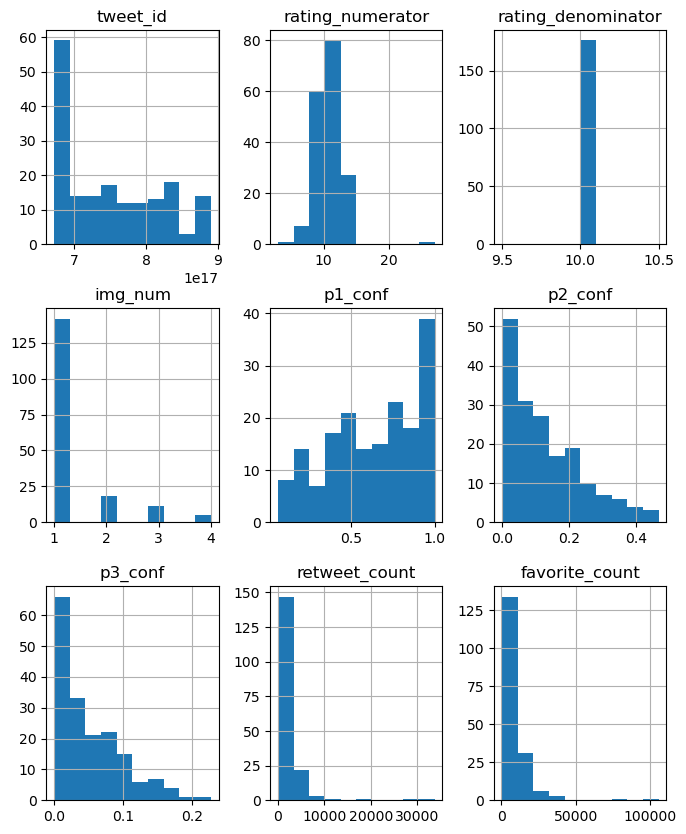

In [125]:
# Plotting the histogram of the cleaned and combined data.
all_data_df.hist(figsize=(8,10));

###### Note:

From the histogram above, it is observed that;
* The 'img_num', 'p2_conf', 'p3_conf', 'retweet_count' and 'favorite_count' columns display a left-skewed or negative-skewed distribution, hence the preferred measure of central tendency is mean. All columns are also unimodal that is; having one peak(or mode).


* The 'p1_conf' column shows a right-skewed or positive-skewed distribution and is unimodal (having one mode/peak). A preferred measure of central tendency is median since it is less sensitive to higher values than the mean.


* The 'rating_denominator' column appears to have a symmetric distribution and is unimodal. 

In [126]:
# Plot functions used for visualization.

def plot_size_and_weight(plot_graph, bold_font=False):
    # To update/change the fontsize of the plot.
    for plot_label in (plot_graph.get_xticklabels() + plot_graph.get_yticklabels()):
        plot_label.set_fontsize(20)
        if bold_font==True:
            plot_label.set_fontweight('bold')
        
def axis_and_titles(plot_title, xaxis_label, yaxis_label, set_grid=False):
    # Setting the title of the figure.
    plt.title(str(plot_title),fontsize = 20)
    # Setting the x-label and y-label of the plot.
    plt.xlabel(str(xaxis_label),fontsize = 18)
    plt.ylabel(str(yaxis_label),fontsize = 18)
    if set_grid==True:
        sns.set_style("whitegrid")

**What are the top 25 common predictions the model/algorithm makes?**

In [127]:
# To display the value count of the models predictions.
all_data_df.p1.value_counts().sort_values(ascending=False).iloc[:25]

golden_retriever                  14
Pomeranian                        6 
Labrador_retriever                6 
Pembroke                          6 
German_shepherd                   5 
pug                               5 
Border_collie                     4 
porcupine                         4 
Eskimo_dog                        4 
Chihuahua                         4 
boxer                             3 
miniature_pinscher                3 
French_bulldog                    3 
chow                              3 
Siberian_husky                    3 
Lakeland_terrier                  3 
toy_poodle                        3 
cocker_spaniel                    3 
American_Staffordshire_terrier    2 
whippet                           2 
Old_English_sheepdog              2 
bloodhound                        2 
Cardigan                          2 
dalmatian                         2 
Bernese_mountain_dog              2 
Name: p1, dtype: int64

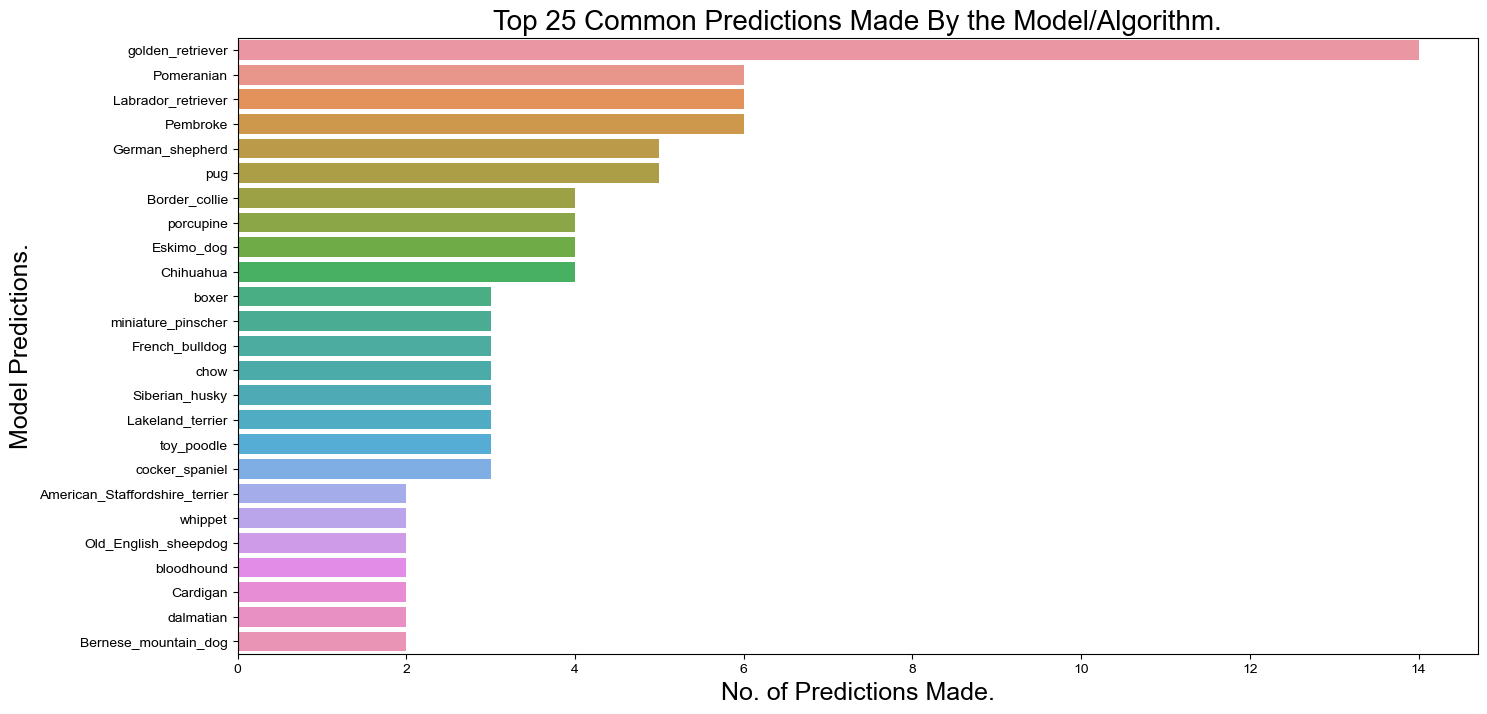

In [128]:
# Plot of the Top 25 Common Predictions Made By the Model/Algorithm.
fig, ax = plt.subplots(figsize=(16, 8))
x_axis= all_data_df.p1.value_counts().sort_values(ascending=False).iloc[:25]
y_axis=x_axis.index
sns.barplot(x=x_axis, y=y_axis, orient='h')
axis_and_titles(plot_title='Top 25 Common Predictions Made By the Model/Algorithm.', 
                xaxis_label= 'No. of Predictions Made.',
                yaxis_label= 'Model Predictions.',
                set_grid=True)

Out of the top 25 commonly made predictions done by the model/algorithm, the 'Golden Retriever' is most often predicted. Following this, the model tends to also predict three others namely; 'Pomeranian', 'Labrador Retriever' and 'Pembroke' in no significant order. From the plot above, the algorithm also makes some mistakes by wrongly predicting other animals as 'dogs' e.g. 'porcupine', 'Siamese cat' and 'wombat', however when compared to the other 22 out of 25 i.e (88%) correct predictions made by the model, the 3 out of 25 (i.e 12%) wrong predictions are minimal.

**What are the top 10 model predictions correctly predictly as a dog with an average confidence score greater than 80%**

In [129]:
# Getting all model predictions sorted based on the confidence score and if it is a dog or not.
all_data_df.groupby('p1')['p1_conf','p1_dog'].mean().sort_values(by=['p1_dog', 'p1_conf'], ascending=False)

C:\Users\User\AppData\Local\Temp\ipykernel_16208\292009134.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  all_data_df.groupby('p1')['p1_conf','p1_dog'].mean().sort_values(by=['p1_dog', 'p1_conf'], ascending=False)


,p1_conf,p1_dog
p1,,
Bernese_mountain_dog,0.977165,1.0
komondor,0.974781,1.0
Samoyed,0.950053,1.0
clumber,0.946718,1.0
German_short-haired_pointer,0.935771,1.0
...,...,...
space_heater,0.206876,0.0
jack-o'-lantern,0.172079,0.0
bow,0.168020,0.0


C:\Users\User\AppData\Local\Temp\ipykernel_16208\1352940898.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  x_axis=all_data_df.groupby('p1')['p1_conf','p1_dog'].mean().sort_values(by=['p1_dog', 'p1_conf'], ascending=False).p1_conf.iloc[:10]


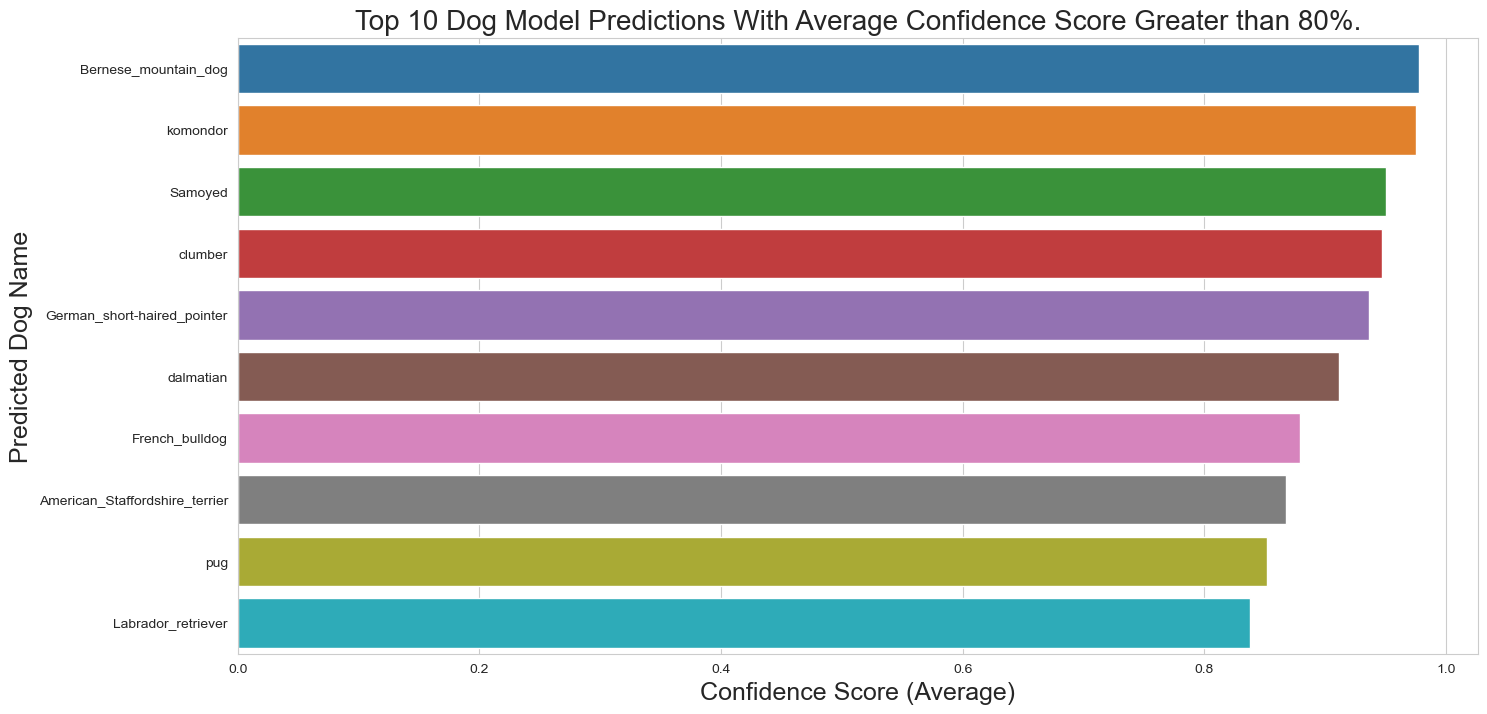

In [130]:
# Plot of the Top 10 Dog Model Predictions With Average Confidence Score Greater than 80%.
fig, ax = plt.subplots(figsize=(16, 8))
x_axis=all_data_df.groupby('p1')['p1_conf','p1_dog'].mean().sort_values(by=['p1_dog', 'p1_conf'], ascending=False).p1_conf.iloc[:10]
y_axis=x_axis.index
sns.barplot(x=x_axis, y=y_axis, orient='h')
axis_and_titles(plot_title='Top 10 Dog Model Predictions With Average Confidence Score Greater than 80%.', 
                xaxis_label='Confidence Score (Average)',
                yaxis_label='Predicted Dog Name',
                set_grid=True)

In this case, the model/algorithm is able to predict with over 80% confidence on an average that the prediction made is a 'dog'. For example, the model was able to properly learn and identify the distinct features of the 'Bernese Mountain dog' with a 97.7% confidence score. This is same with the other 9 predictions where the model could predict them with a confidence score greater than 80%. In addition, though the 'Bernese Mountain dog' was not commonly predicted as often by the model, the model could the distinguish its features with a high confidence score.

**What is the favorite count for each dog stage?**

In [131]:
# Grouping the dog stages by the average of the retweet count.
all_data_df.groupby('stage')['retweet_count'].mean().sort_values(ascending=False)

stage
doggo      4454.171429
puppo      2598.866667
floofer    1775.600000
pupper     1772.966942
Name: retweet_count, dtype: float64

In [132]:
# Grouping the dog stages by the average of the favorite count.
all_data_df.groupby('stage')['favorite_count'].mean().sort_values(ascending=False)

stage
doggo      15601.857143
puppo      10352.600000
floofer    7939.400000 
pupper     6307.132231 
Name: favorite_count, dtype: float64

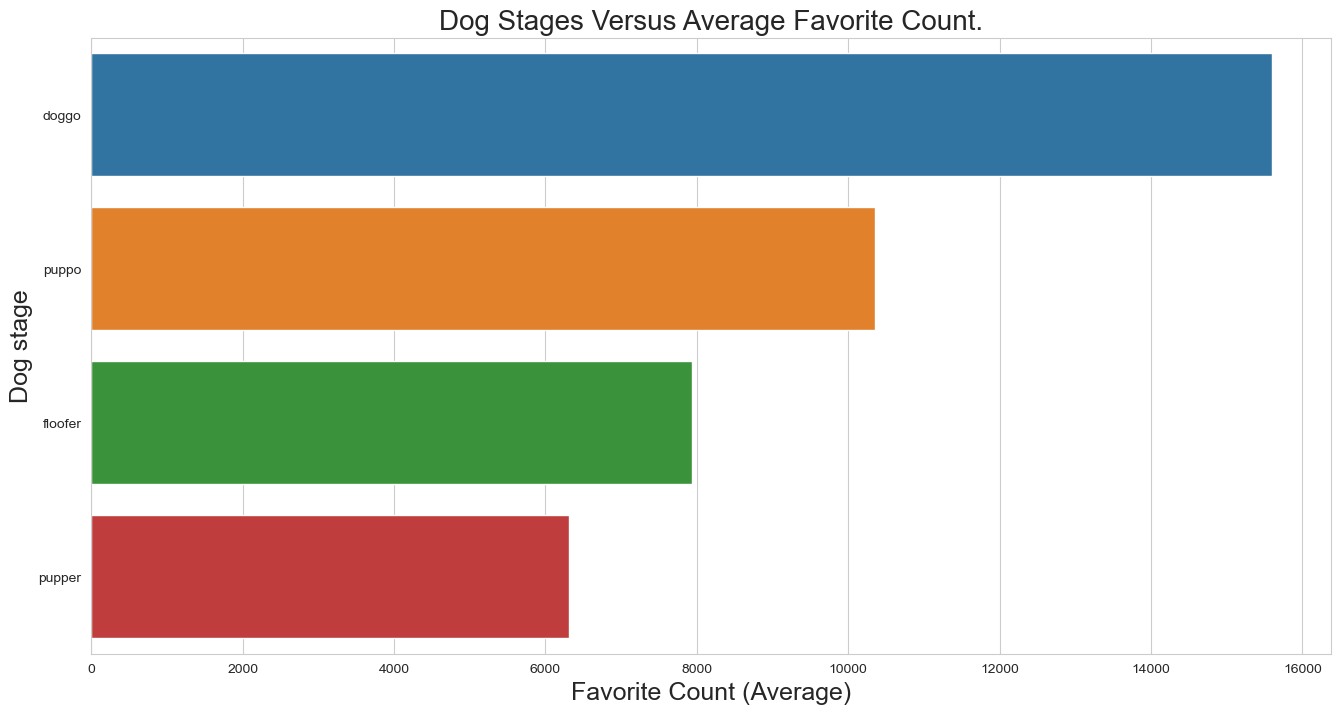

In [133]:
# Plot of the Dog Stages Versus the Average Favorite Count. 
fig, ax = plt.subplots(figsize=(16, 8))
x_axis= all_data_df.groupby('stage')['favorite_count'].mean().sort_values(ascending=False).iloc[:]
y_axis=x_axis.index
sns.barplot(x=x_axis, y=y_axis, orient='h')
axis_and_titles(plot_title='Dog Stages Versus Average Favorite Count.', 
                xaxis_label='Favorite Count (Average)',
                yaxis_label='Dog stage',
                set_grid=True)

From the plot above, 'doggo' has displayed the highest favorite count with approximately 15,601 likes on average when combined. From analysis, images of doggos are also among the most retweeted images with a high retweet count of approximately 4,454 when combined on an average. Hence, doggos tend to be more popularly admired when compared to other dog stages and this could be attributed to the fact that they are older and often more composed/well-behaved.